In [14]:
import numpy as np
import pandas as pd
import os
import tqdm

In [15]:
dat1 = np.load("gathered_k_runs.pkl", allow_pickle=True)
dat2 = np.load("gathered_data.pkl", allow_pickle=True)
combined_df = pd.concat([dat1, dat2], ignore_index=True)
combined_df.to_pickle("final.pkl")  

In [2]:
folder = "data/processed/"
focus = "all"

def gather_data(folder, focus):
    data_loc = folder + focus
    files = os.listdir(data_loc)
    files = filter(lambda x: (len(x) > 4) and (".csv" == x[-4:]), files)
    files = map(lambda x: data_loc + '/' + x, files)
    files = map(pd.read_csv, files)
    return pd.concat(files).reset_index(drop = True)

#df_data = gather_data(folder, focus)
df_data = np.load("gathered_data_10000.pkl", allow_pickle=True)

In [3]:
df_data.describe()

c        k        n             p          zeta  \
count  96000.00000  96000.0  96000.0  96000.000000  96000.000000   
mean       0.45000      4.0    100.0      0.203267      0.275000   
std        0.22913      0.0      0.0      0.259123      0.114565   
min        0.10000      4.0    100.0      0.007000      0.100000   
25%        0.27500      4.0    100.0      0.019000      0.187500   
50%        0.45000      4.0    100.0      0.078000      0.275000   
75%        0.62500      4.0    100.0      0.317000      0.362500   
max        0.80000      4.0    100.0      0.905000      0.450000   

       analytical_sigma_cont  kuramoto_euler_sigma_squared_all  \
count           96000.000000                      96000.000000   
mean                0.401589                          0.829197   
std                 0.611197                          0.887511   
min                 0.006951                          0.007016   
25%                 0.077371                          0.118565   
50%                 0.194494                          0.393669   
75%                 0.460686                          1.436422   
max                 6.829102                          3.162458   

       kuramoto_euler_sigma_squared_1000  kuramoto_euler_sigma_squared_100  \
count                       96000.000000                      96000.000000   
mean                            0.865443                          0.881891   
std                             0.910483                          0.938062   
min                             0.006966                          0.006644   
25%                             0.120965                          0.119909   
50%                             0.420443                          0.420124   
75%                             1.539434                          1.559332   
max                             3.164634                          3.240159   

       kuramoto_euler_sigma_squared_10  ou_euler_sigma_squared_all  \
count                     96000.000000                96000.000000   
mean                          0.884255                    0.408899   
std                           0.948570                    0.638120   
min                           0.005693                    0.006972   
25%                           0.117704                    0.078070   
50%                           0.415479                    0.196227   
75%                           1.550236                    0.465591   
max                           3.417749                   13.274520   

       ou_euler_sigma_squared_1000  ou_euler_sigma_squared_100  \
count                 96000.000000                96000.000000   
mean                      0.404595                    0.400104   
std                       0.645685                    0.658385   
min                       0.006923                    0.006607   
25%                       0.077539                    0.075903   
50%                       0.194469                    0.190042   
75%                       0.458837                    0.444608   
max                      14.128515                   17.739839   

       ou_euler_sigma_squared_10  
count               96000.000000  
mean                    0.398931  
std                     0.661646  
min                     0.005664  
25%                     0.074842  
50%                     0.186014  
75%                     0.438195  
max                    16.284444

In [4]:
id_col = ("p", "zeta", "c", "k")
df_data_clean = pd.DataFrame(index = df_data.index)
for i in id_col:
    df_data_clean[i] = df_data[i]
df_data_clean["analytical_sigma_continuous"] = df_data["analytical_sigma_cont"]
df_data_clean["kuramoto_sigma_squared"] = df_data["kuramoto_euler_sigma_squared_all"]
df_data_clean["linear_sigma_squared"] = df_data["ou_euler_sigma_squared_all"]

In [5]:
REL_ERR = lambda df, Measured_Label, True_Label: abs(df[Measured_Label] - df[True_Label]) / df[True_Label]

id_col = ("p", "zeta", "c")

def proc_data(df_data, id_col):

    err_data = pd.DataFrame(index=df_data.index)

    for label in id_col:
        err_data[label] = df_data[label]
    err_data["sigma_relative_error_continuous"] = REL_ERR(df_data, "analytical_sigma_continuous", "linear_sigma_squared")
    err_data["empirical_relative_error_linear_kuramoto"] = REL_ERR(df_data, "linear_sigma_squared", "kuramoto_sigma_squared")
    err_data["sigma_relative_error_continuous_kuramoto"] = REL_ERR(df_data, "analytical_sigma_continuous", "kuramoto_sigma_squared")
    err_data["sigma_continuous_analytic_real"] = df_data["analytical_sigma_continuous"]
    err_data["sigma_continuous_kuramoto_real"] = df_data["kuramoto_sigma_squared"]


    err_data_mean = err_data.groupby(list(id_col)).mean()
    err_data_names = err_data_mean.columns
    err_data_mean = err_data_mean.reset_index(drop = False)
    return err_data_mean, err_data

err_data_mean, err_data = proc_data(df_data_clean, id_col)

In [6]:
display(err_data_mean.describe())
display(err_data_mean.head())

p        zeta           c  sigma_relative_error_continuous  \
count  960.000000  960.000000  960.000000                       960.000000   
mean     0.203267    0.275000    0.450000                         0.033532   
std      0.259257    0.114624    0.229248                         0.034520   
min      0.007000    0.100000    0.100000                         0.002961   
25%      0.019000    0.187500    0.275000                         0.005663   
50%      0.078000    0.275000    0.450000                         0.018045   
75%      0.317000    0.362500    0.625000                         0.054973   
max      0.905000    0.450000    0.800000                         0.195300   

       empirical_relative_error_linear_kuramoto  \
count                                960.000000   
mean                                   0.331229   
std                                    0.226553   
min                                    0.006228   
25%                                    0.126892   
50%                                    0.306467   
75%                                    0.524619   
max                                    0.957666   

       sigma_relative_error_continuous_kuramoto  \
count                                960.000000   
mean                                   0.336628   
std                                    0.228589   
min                                    0.010293   
25%                                    0.130572   
50%                                    0.312788   
75%                                    0.531762   
max                                    0.911257   

       sigma_continuous_analytic_real  sigma_continuous_kuramoto_real  
count                      960.000000                      960.000000  
mean                         0.401589                        0.829197  
std                          0.601226                        0.803160  
min                          0.007007                        0.007088  
25%                          0.076800                        0.160478  
50%                          0.195246                        0.557313  
75%                          0.461185                        1.273059  
max                          5.408185                        2.829629

p  zeta    c  sigma_relative_error_continuous  \
0  0.007   0.1  0.1                         0.160574   
1  0.007   0.1  0.2                         0.114932   
2  0.007   0.1  0.3                         0.098440   
3  0.007   0.1  0.4                         0.088387   
4  0.007   0.1  0.5                         0.072628   

   empirical_relative_error_linear_kuramoto  \
0                                  0.647484   
1                                  0.667867   
2                                  0.719109   
3                                  0.746717   
4                                  0.769690   

   sigma_relative_error_continuous_kuramoto  sigma_continuous_analytic_real  \
0                                  0.682671                        0.262612   
1                                  0.689119                        0.131008   
2                                  0.735287                        0.090106   
3                                  0.763196                        0.066176   
4                                  0.784324                        0.052762   

   sigma_continuous_kuramoto_real  
0                        1.418617  
1                        1.442031  
2                        1.579163  
3                        1.575356  
4                        1.528072

In [40]:
display(err_data.describe())
display(err_data.head())

p          zeta            c  \
count  96000.000000  96000.000000  96000.00000   
mean       0.203267      0.275000      0.45000   
std        0.259123      0.114565      0.22913   
min        0.007000      0.100000      0.10000   
25%        0.019000      0.187500      0.27500   
50%        0.078000      0.275000      0.45000   
75%        0.317000      0.362500      0.62500   
max        0.905000      0.450000      0.80000   

       sigma_relative_error_continuous  \
count                     9.600000e+04   
mean                      3.353238e-02   
std                       5.301429e-02   
min                       2.106179e-07   
25%                       4.478022e-03   
50%                       1.168044e-02   
75%                       3.953906e-02   
max                       8.601473e-01   

       empirical_relative_error_linear_kuramoto  \
count                              96000.000000   
mean                                   0.331229   
std                                    0.310649   
min                                    0.000024   
25%                                    0.070335   
50%                                    0.200572   
75%                                    0.552097   
max                                    3.706933   

       sigma_relative_error_continuous_kuramoto  \
count                              96000.000000   
mean                                   0.336628   
std                                    0.306447   
min                                    0.000006   
25%                                    0.078822   
50%                                    0.210840   
75%                                    0.555680   
max                                    1.412566   

       sigma_continuous_analytic_real  sigma_continuous_kuramoto_real  
count                    96000.000000                    96000.000000  
mean                         0.401589                        0.829197  
std                          0.611197                        0.887511  
min                          0.006951                        0.007016  
25%                          0.077371                        0.118565  
50%                          0.194494                        0.393669  
75%                          0.460686                        1.436422  
max                          6.829102                        3.162458

p  zeta    c  sigma_relative_error_continuous  \
0  0.317  0.40  0.2                         0.011042   
1  0.157  0.35  0.1                         0.012060   
2  0.111  0.35  0.6                         0.011933   
3  0.905  0.20  0.3                         0.000600   
4  0.078  0.40  0.6                         0.006204   

   empirical_relative_error_linear_kuramoto  \
0                                  0.746964   
1                                  0.632802   
2                                  0.133661   
3                                  0.070068   
4                                  0.180639   

   sigma_relative_error_continuous_kuramoto  sigma_continuous_analytic_real  \
0                                  0.749758                        0.538846   
1                                  0.637230                        0.972960   
2                                  0.144000                        0.211531   
3                                  0.070627                        0.074632   
4                                  0.185722                        0.280351   

   sigma_continuous_kuramoto_real  
0                        2.153297  
1                        2.682034  
2                        0.247116  
3                        0.080303  
4                        0.344294

In [7]:
import matplotlib.pyplot as plt

#df should be prepivoted and filtered
def graph_diff(df, plt_name, splt_name_func, err_data_names, min_max = None, nfi = None, col_ind = ("x", "y"), size = (2, 2)):
    err_data_names = df.columns
    fig, axes = plt.subplots(nrows=size[0], ncols=size[1])
    fig.suptitle(plt_name)
    
    fig.set_size_inches(20, 10)
    fig.subplots_adjust(top=0.95)
    
    if min_max is None and nfi is not None:
        cmax = df[nfi.keys()].max().max()
        cmin = df[nfi.keys()].min().min()
    else:
        cmax = min_max[1]
        cmin = min_max[0]

    for name_index in range(len(axes.flat)):
        if name_index >= len(err_data_names):
            ax = axes.flat[name_index]
            ax.axis('off')
            continue
        if nfi is not None:
            if name_index >= len(nfi):
                ax = axes.flat[name_index]
                ax.axis('off')            
                continue
            name = list(nfi.keys())[name_index]
        else:
            name = list(err_data_names)[name_index]
        df_p = df[name]
        #display(df_p)
        np_a = df_p.to_numpy()
        ax = axes.flat[name_index]

        x_t = df_p.columns.to_numpy()
        y_t = df_p.index.to_numpy()
        ax.set_xticks(np.arange(0, len(x_t)), labels=x_t)
        ax.set_yticks(np.arange(0, len(y_t)), labels=y_t)

        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
        ax.set_title(splt_name_func(name))
        ax.set_ylabel(df_p.index.names[0])
        ax.set_xlabel(df_p.columns.names[0])

        im = ax.imshow(np_a,interpolation="gaussian", cmap="jet", vmin=cmin, vmax=cmax)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.046, pad=0.04, shrink = 0.7)
    cbar.ax.set_ylabel("value", rotation=-90, va="bottom")

    plt.show()

    print("\n" * 10)

In [8]:

NAMES_FOR_INDEXES = {
    'sigma_relative_error_continuous_kuramoto': "Mean Relative Error for Continuous Analytical vs. Kuramoto Empirical",
    'sigma_relative_error_continuous': "Mean Relative Error for Continuous Analytical vs. O-U Empirical",
    'empirical_relative_error_linear_kuramoto': "Mean Relative Error for O-U Empirical vs. Kuramoto Empirical",
}


NFI_2 = {
    'sigma_continuous_kuramoto_real': "Mean Value for Empirical Kuramoto Sigma Squared",
    'sigma_continuous_analytic_real': "Mean Value for Continuous Analytical Sigma Squared",
}
NAME_FUNC = lambda x: str(NAMES_FOR_INDEXES[x])

NAME_FUNC_2 = lambda x: str(NFI_2[x])

print(set(err_data_mean.columns) - set(NAMES_FOR_INDEXES.keys()))

df_raw = err_data_mean.drop(id_col[0], axis = 1)
cmin = df_raw.min().min()
cmax = df_raw.max().max()

mm = [cmin, cmax]
#mm = None


mm_2 = [cmin, cmax]


def xyzplot(var, col, ind, minmax = False):
    if minmax:
        df_raw = err_data_mean.drop(id_col[0], axis = 1)
        cmin = df_raw.min().min()
        cmax = df_raw.max().max()
        mm = [cmin, cmax]
    for v in err_data_mean[var].unique():
        df_test = err_data_mean[err_data_mean[var] == v].drop(var, axis=1).pivot(columns=col, index=ind)
        df_test = df_test.sort_index(ascending=False)
        df_test = df_test.reindex(sorted(df_test.columns), axis=1)
        #display(df_test)
        graph_diff(df_test, "Plots for " + var + " = "+str(v), NAME_FUNC, err_data_mean.columns, min_max=mm if minmax else None, nfi = NAMES_FOR_INDEXES, col_ind = (col, ind))
        graph_diff(df_test, "Plots for " + var + " = "+str(v), NAME_FUNC_2, err_data_mean.columns, min_max=mm_2 if minmax else None, nfi = NFI_2, col_ind = (col, ind))

{'sigma_continuous_analytic_real', 'sigma_continuous_kuramoto_real', 'c', 'p', 'zeta'}


In [42]:
num_list = ["10", "100", "1000", "all"]
folder = "data/processed/"
id_col = ("p", "zeta", "c")

#display(df_data.describe())

#data_list = map(lambda x: (gather_data(folder, x), x), num_list)
#data_list = map(lambda x: (proc_data(x[0], id_col), x[1]), data_list)
#data_list = map(lambda x: (x[0], 10000) if x[1] == "all" else (x[0], int(x[1])), data_list)
#data_list = map(lambda x: (x[0], x[0].insert(0, "sample_count", [x[1]] * len(x[0])))[0], data_list)

id_col = ("p", "zeta", "c")

def proc_data_2(df_data, id_col):

    err_data = pd.DataFrame(index=df_data.index)

    for label in id_col:
        err_data[label] = df_data[label]
    for n in num_list:
        if n == "all":
            str_val = "10000"
        else:
            str_val = str(n)
        err_data["sigma_relative_error_continuous_" + str_val] = REL_ERR(df_data, "analytical_sigma_cont", "ou_euler_sigma_squared_" + str(n))
        err_data["sigma_relative_error_continuous_kuramoto_" + str_val] = REL_ERR(df_data, "analytical_sigma_cont", "kuramoto_euler_sigma_squared_" + str(n))


    
    #err_data["sigma_continuous_analytic_real"] = df_data["analytical_sigma_continuous"]
    #err_data["sigma_continuous_kuramoto_real"] = df_data["kuramoto_sigma_squared"]


    err_data_mean = err_data.groupby(list(id_col)).mean()
    err_data_names = err_data_mean.columns
    err_data_mean = err_data_mean.reset_index(drop = False)
    return err_data_mean, err_data

(multi_sample, err_data) = proc_data_2(df_data[df_data.k == 4], id_col)
display(multi_sample)
csamp = multi_sample
#multi_sample = pd.concat(data_list).reset_index(drop = True)


p  zeta    c  sigma_relative_error_continuous_10  \
0    0.007  0.10  0.1                            0.503683   
1    0.007  0.10  0.2                            0.421023   
2    0.007  0.10  0.3                            0.444754   
3    0.007  0.10  0.4                            0.496047   
4    0.007  0.10  0.5                            0.457870   
..     ...   ...  ...                                 ...   
955  0.905  0.45  0.4                            0.058779   
956  0.905  0.45  0.5                            0.062814   
957  0.905  0.45  0.6                            0.061869   
958  0.905  0.45  0.7                            0.055531   
959  0.905  0.45  0.8                            0.059534   

     sigma_relative_error_continuous_kuramoto_10  \
0                                       0.794100   
1                                       0.804048   
2                                       0.863115   
3                                       0.862995   
4                                       0.849278   
..                                           ...   
955                                     0.364399   
956                                     0.264018   
957                                     0.203595   
958                                     0.171278   
959                                     0.128420   

     sigma_relative_error_continuous_100  \
0                               0.451299   
1                               0.379000   
2                               0.423656   
3                               0.416544   
4                               0.355776   
..                                   ...   
955                             0.021782   
956                             0.022943   
957                             0.021513   
958                             0.019074   
959                             0.018706   

     sigma_relative_error_continuous_kuramoto_100  \
0                                        0.789023   
1                                        0.795267   
2                                        0.856215   
3                                        0.861550   
4                                        0.853609   
..                                            ...   
955                                      0.374305   
956                                      0.264025   
957                                      0.206087   
958                                      0.170193   
959                                      0.138337   

     sigma_relative_error_continuous_1000  \
0                                0.298849   
1                                0.240973   
2                                0.218324   
3                                0.226526   
4                                0.181978   
..                                    ...   
955                              0.008905   
956                              0.007232   
957                              0.007577   
958                              0.006526   
959                              0.006067   

     sigma_relative_error_continuous_kuramoto_1000  \
0                                         0.747794   
1                                         0.773203   
2                                         0.792716   
3                                         0.796384   
4                                         0.797391   
..                                             ...   
955                                       0.379777   
956                                       0.266655   
957                                       0.207518   
958                                       0.169674   
959                                       0.145781   

     sigma_relative_error_continuous_10000  \
0                                 0.160574   
1                                 0.114932   
2                                 0.098440   
3                                 0.088387   
4                                 0.072628   
..                 

In [43]:
display(multi_sample.sample(10))

display(multi_sample.describe())

p  zeta    c  sigma_relative_error_continuous_10  \
345  0.039  0.25  0.2                            0.294275   
768  0.449  0.10  0.1                            0.120490   
562  0.111  0.40  0.3                            0.192268   
256  0.027  0.10  0.1                            0.356371   
208  0.019  0.20  0.1                            0.400756   
72   0.010  0.15  0.1                            0.417640   
230  0.019  0.30  0.7                            0.384027   
218  0.019  0.25  0.3                            0.340163   
264  0.027  0.15  0.1                            0.329443   
625  0.157  0.40  0.2                            0.170979   

     sigma_relative_error_continuous_kuramoto_10  \
345                                     0.378286   
768                                     0.129861   
562                                     0.527560   
256                                     0.795080   
208                                     0.432923   
72                                      0.585680   
230                                     0.649605   
218                                     0.521623   
264                                     0.603614   
625                                     0.699085   

     sigma_relative_error_continuous_100  \
345                             0.214757   
768                             0.058014   
562                             0.112474   
256                             0.278993   
208                             0.356573   
72                              0.427616   
230                             0.272460   
218                             0.298540   
264                             0.304973   
625                             0.091013   

     sigma_relative_error_continuous_kuramoto_100  \
345                                      0.360225   
768                                      0.074101   
562                                      0.562187   
256                                      0.778258   
208                                      0.435972   
72                                       0.582554   
230                                      0.608253   
218                                      0.497817   
264                                      0.567131   
625                                      0.699431   

     sigma_relative_error_continuous_1000  \
345                              0.118018   
768                              0.019432   
562                              0.040598   
256                              0.171104   
208                              0.253369   
72                               0.288612   
230                              0.101817   
218                              0.156391   
264                              0.208340   
625                              0.037273   

     sigma_relative_error_continuous_kuramoto_1000  \
345                                       0.298849   
768                                       0.059301   
562                                       0.605562   
256                                       0.748305   
208                                       0.438188   
72                                        0.570083   
230                                       0.540439   
218                                       0.427813   
264                                       0.547064   
625                                       0.708485   

     sigma_relative_error_continuous_10000  \
345                               0.040874   
768                               0.006766   
562                               0.014631   
256                               0.071346   
208                               0.115245   
72                                0.140269   
230                               0.041523   
218                               0.058500   
264                               0.083749   
625                               0.012158   

     sigma_relative_error_continuous_kuramoto_10000  
345                                        

p        zeta           c  sigma_relative_error_continuous_10  \
count  960.000000  960.000000  960.000000                          960.000000   
mean     0.203267    0.275000    0.450000                            0.235189   
std      0.259257    0.114624    0.229248                            0.141413   
min      0.007000    0.100000    0.100000                            0.043686   
25%      0.019000    0.187500    0.275000                            0.104340   
50%      0.078000    0.275000    0.450000                            0.201629   
75%      0.317000    0.362500    0.625000                            0.362314   
max      0.905000    0.450000    0.800000                            0.600480   

       sigma_relative_error_continuous_kuramoto_10  \
count                                   960.000000   
mean                                      0.391594   
std                                       0.242095   
min                                       0.050025   
25%                                       0.163251   
50%                                       0.372728   
75%                                       0.604457   
max                                       0.912776   

       sigma_relative_error_continuous_100  \
count                           960.000000   
mean                              0.166226   
std                               0.131395   
min                               0.015991   
25%                               0.044799   
50%                               0.128303   
75%                               0.281232   
max                               0.537260   

       sigma_relative_error_continuous_kuramoto_100  \
count                                    960.000000   
mean                                       0.368692   
std                                        0.246697   
min                                        0.018230   
25%                                        0.138674   
50%                                        0.348528   
75%                                        0.583941   
max                                        0.917679   

       sigma_relative_error_continuous_1000  \
count                            960.000000   
mean                               0.082373   
std                                0.079082   
min                                0.006067   
25%                                0.014791   
50%                                0.049286   
75%                                0.139196   
max                                0.342722   

       sigma_relative_error_continuous_kuramoto_1000  \
count                                     960.000000   
mean                                        0.351547   
std                                         0.237824   
min                                         0.010458   
25%                                         0.133530   
50%                                         0.324693   
75%                                         0.559061   
max                                         0.914198   

       sigma_relative_error_continuous_10000  \
count                             960.000000   
mean                                0.033532   
std                                 0.034520   
min                                 0.002961   
25%                                 0.005663   
50%                                 0.018045   
75%                                 0.054973   
max                                 0.195300   

       sigma_relative_error_continuous_kuramoto_10000  
count                                      960.000000  
mean                                         0.336628  
std                                          0.228589  
min                                          0.010293  
25%                                          0.130572  
50%                                          0.312788  
75%                                          0.531762  
max                                          0.911257

In [44]:
import matplotlib.pyplot as plt

#df should be prepivoted and filtered
def graph_diff(df, plt_name, splt_name_func, err_data_names, min_max = None, nfi = None, col_ind = ("x", "y"), size = (5, 2)):
    err_data_names = df.columns.get_level_values(0)
    fig, axes = plt.subplots(nrows=size[0], ncols=size[1])
    fig.suptitle(plt_name)
    
    fig.set_size_inches(25, 30)
    fig.subplots_adjust(top=0.95)
    
    if min_max is None:
        cmax = df.max().max()
        cmin = df.min().min()
    else:
        cmax = min_max[1]
        cmin = min_max[0]

    for name_index in range(len(axes.flat)):
        if name_index >= len(err_data_names):
            ax = axes.flat[name_index]
            ax.axis('off')
            continue
        if nfi is not None:
            name = list(nfi.keys())[name_index]
        else:
            name = list(set(err_data_names) - set(col_ind))[name_index]
        df_p = df[name]
        #display(df_p)
        np_a = df_p.to_numpy()
        ax = axes.flat[name_index]

        x_t = df_p.columns.to_numpy()
        y_t = df_p.index.to_numpy()
        ax.set_xticks(np.arange(0, len(x_t)), labels=x_t)
        ax.set_yticks(np.arange(0, len(y_t)), labels=y_t)

        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
        ax.set_title(splt_name_func(name))
        ax.set_ylabel(df_p.index.names[0])
        ax.set_xlabel(df_p.columns.names[0])

        im = ax.imshow(np_a,interpolation="gaussian", cmap="jet", vmin=cmin, vmax=cmax)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.046, pad=0.04, shrink = 0.7)
    cbar.ax.set_ylabel("value", rotation=-90, va="bottom")

    plt.show()
    print("\n" * 10)

In [45]:
NAME_FUNC = lambda x: str(x)

def xyzplot2(data, var, col, ind):
    for v in data[var].unique():
        df_test = data[data[var] == v].drop(var, axis=1).pivot(columns=col, index=ind)
        df_test = df_test.sort_index(ascending=False)
        df_test = df_test.reindex(sorted(df_test.columns), axis=1)
        #display(df_test)
        graph_diff(df_test, "Plots for " + var + " = "+str(v), NAME_FUNC, df_test.columns, col_ind = (col, ind), size = (4,2))

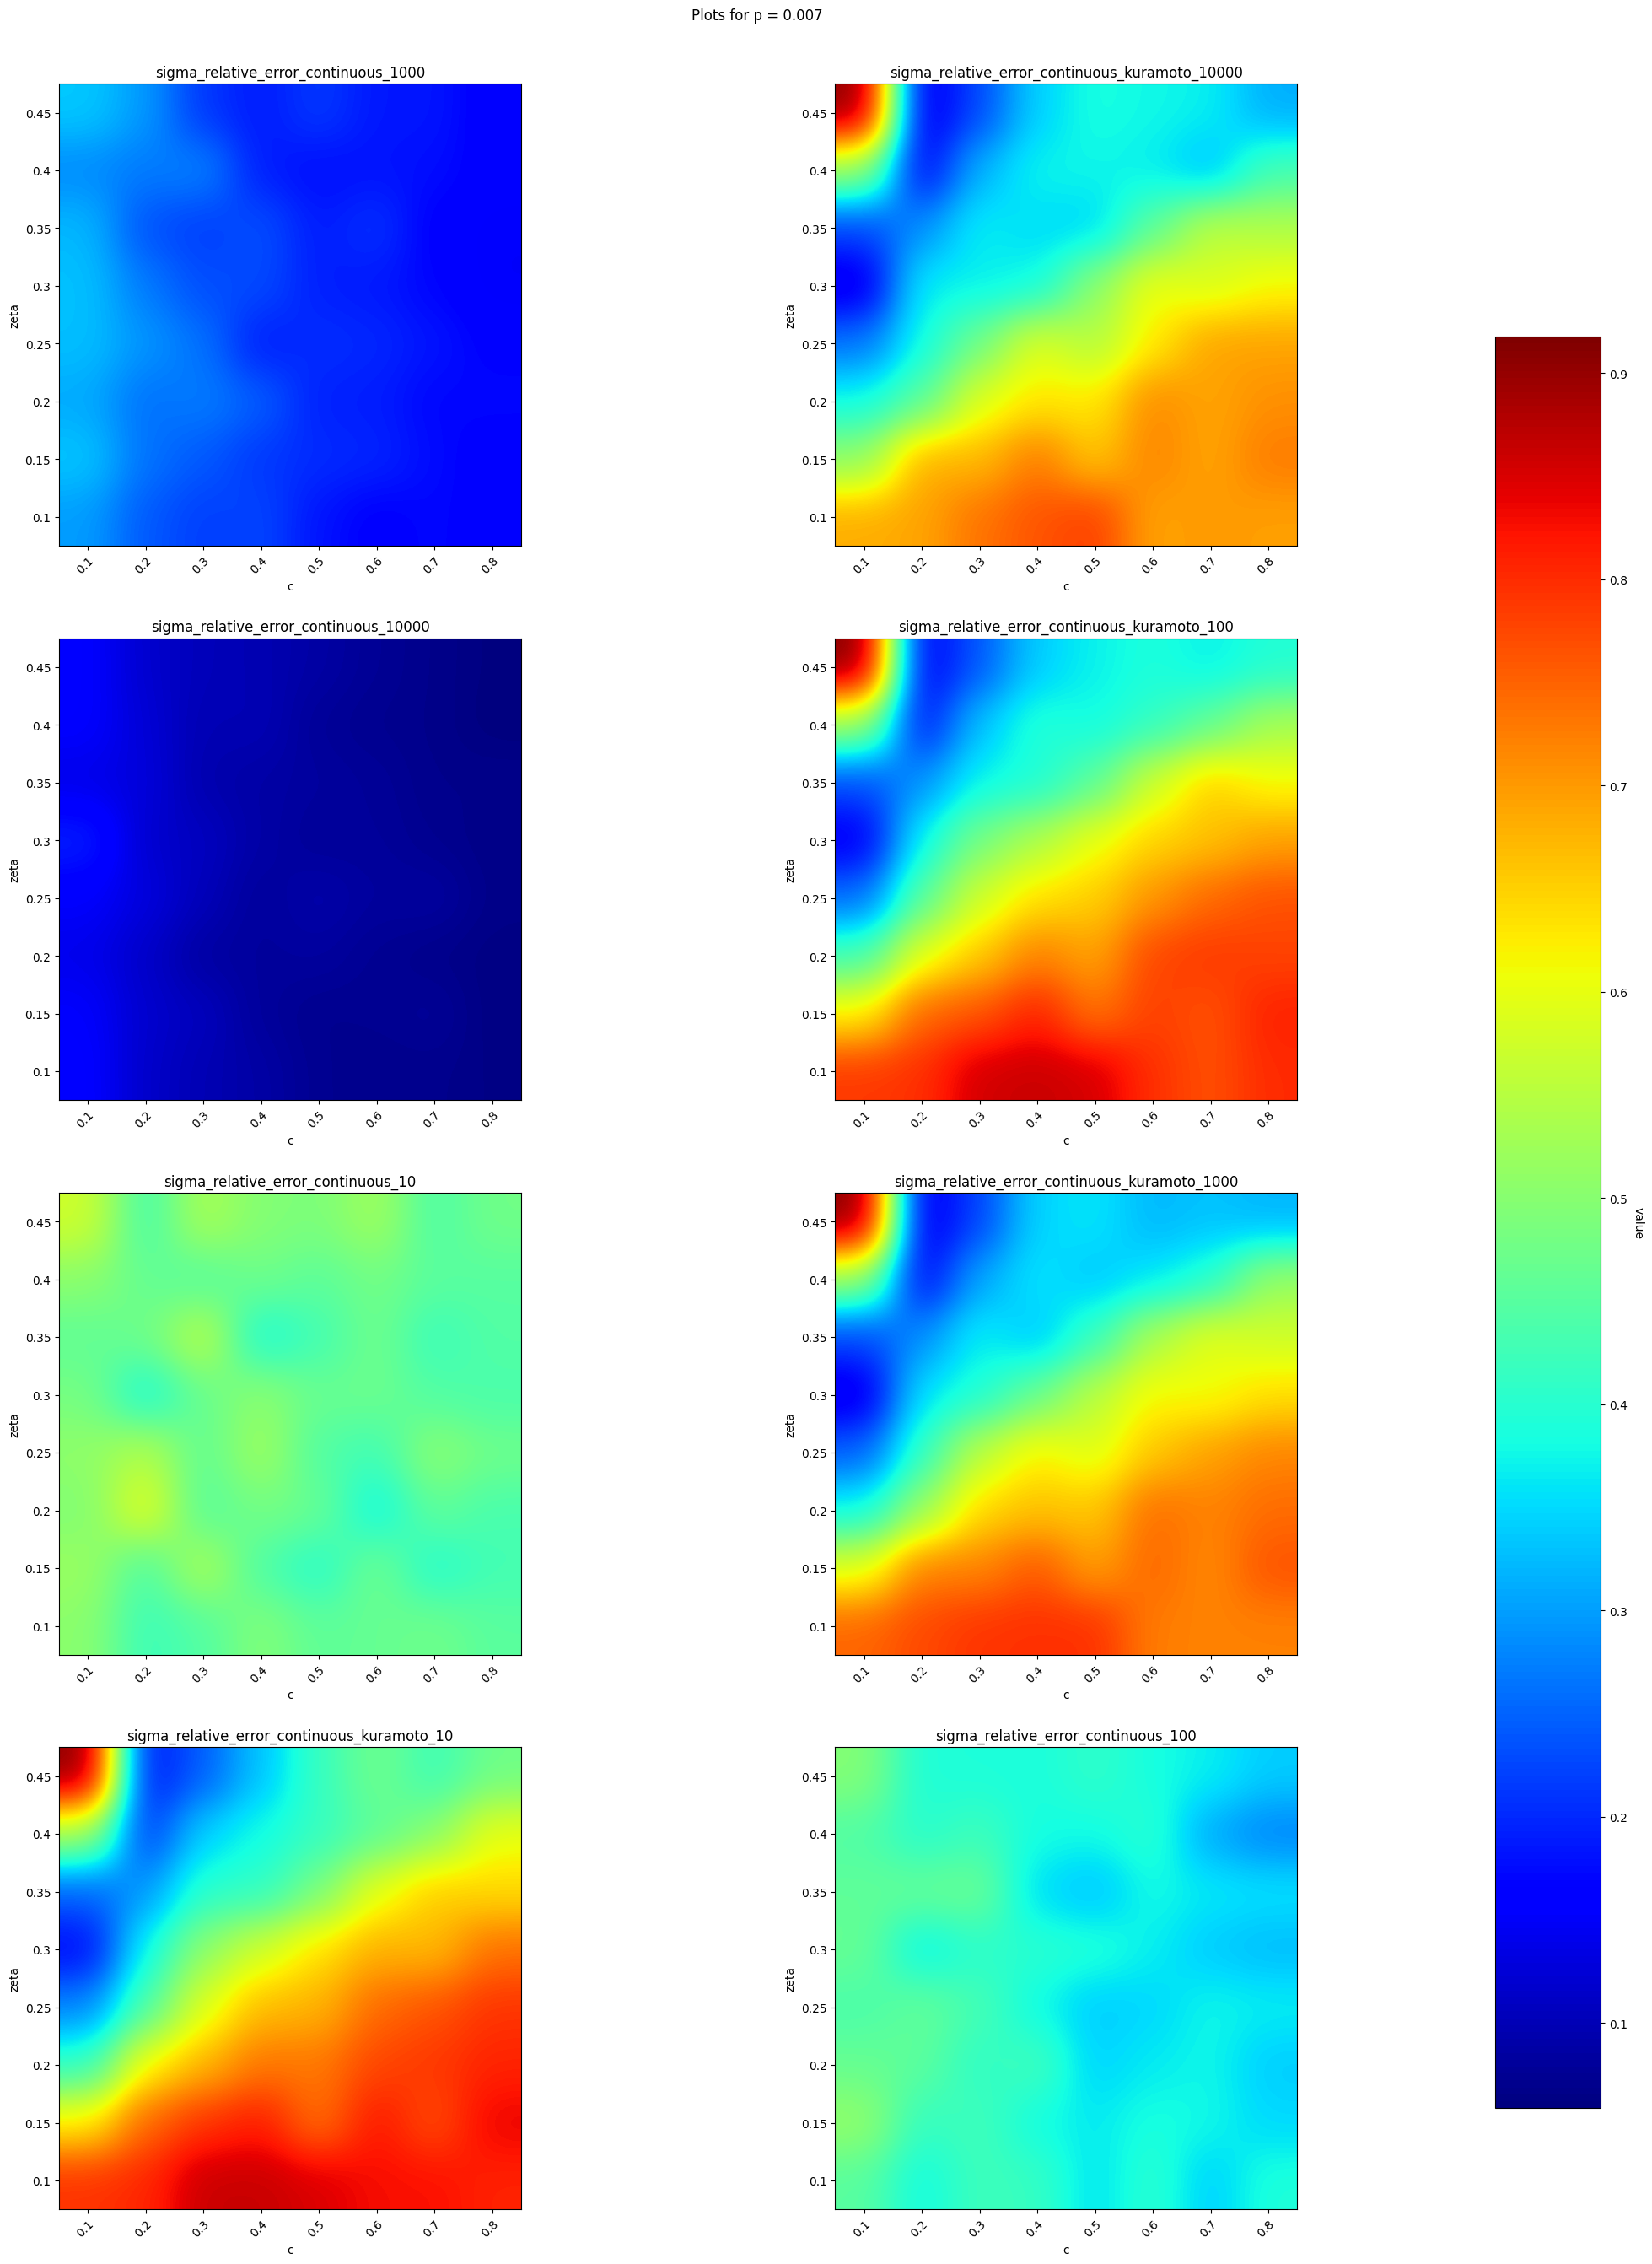

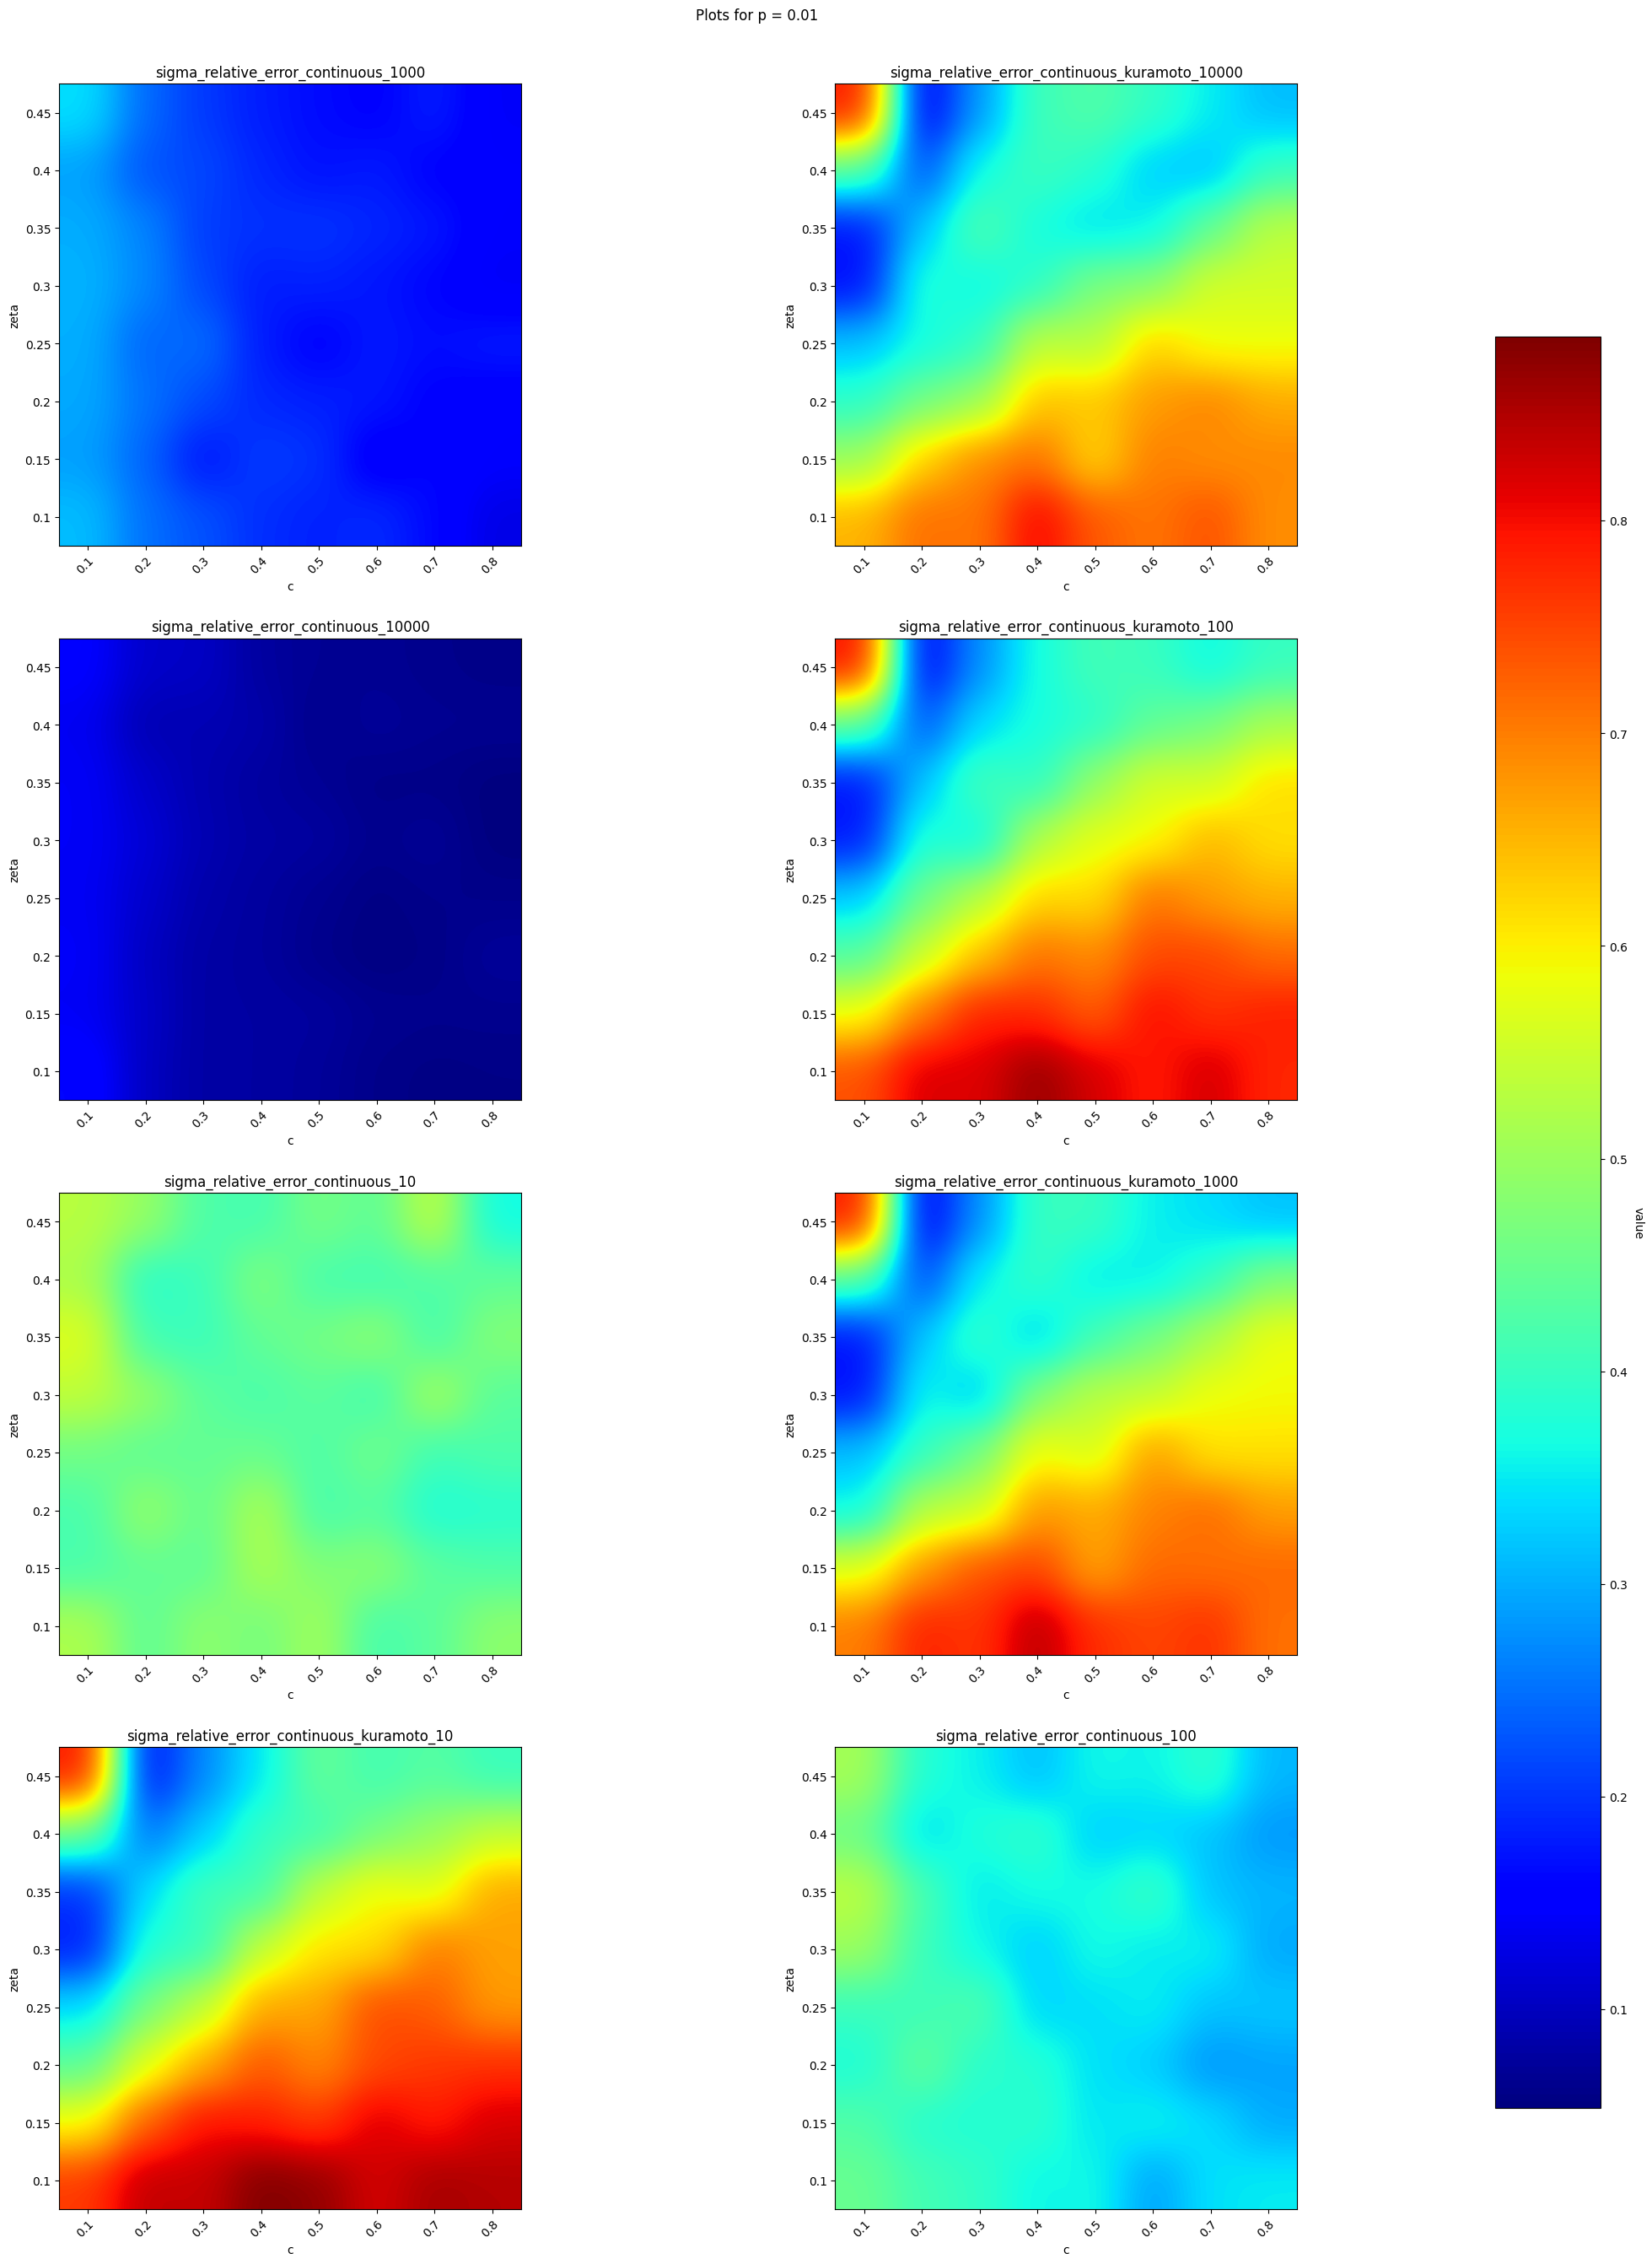

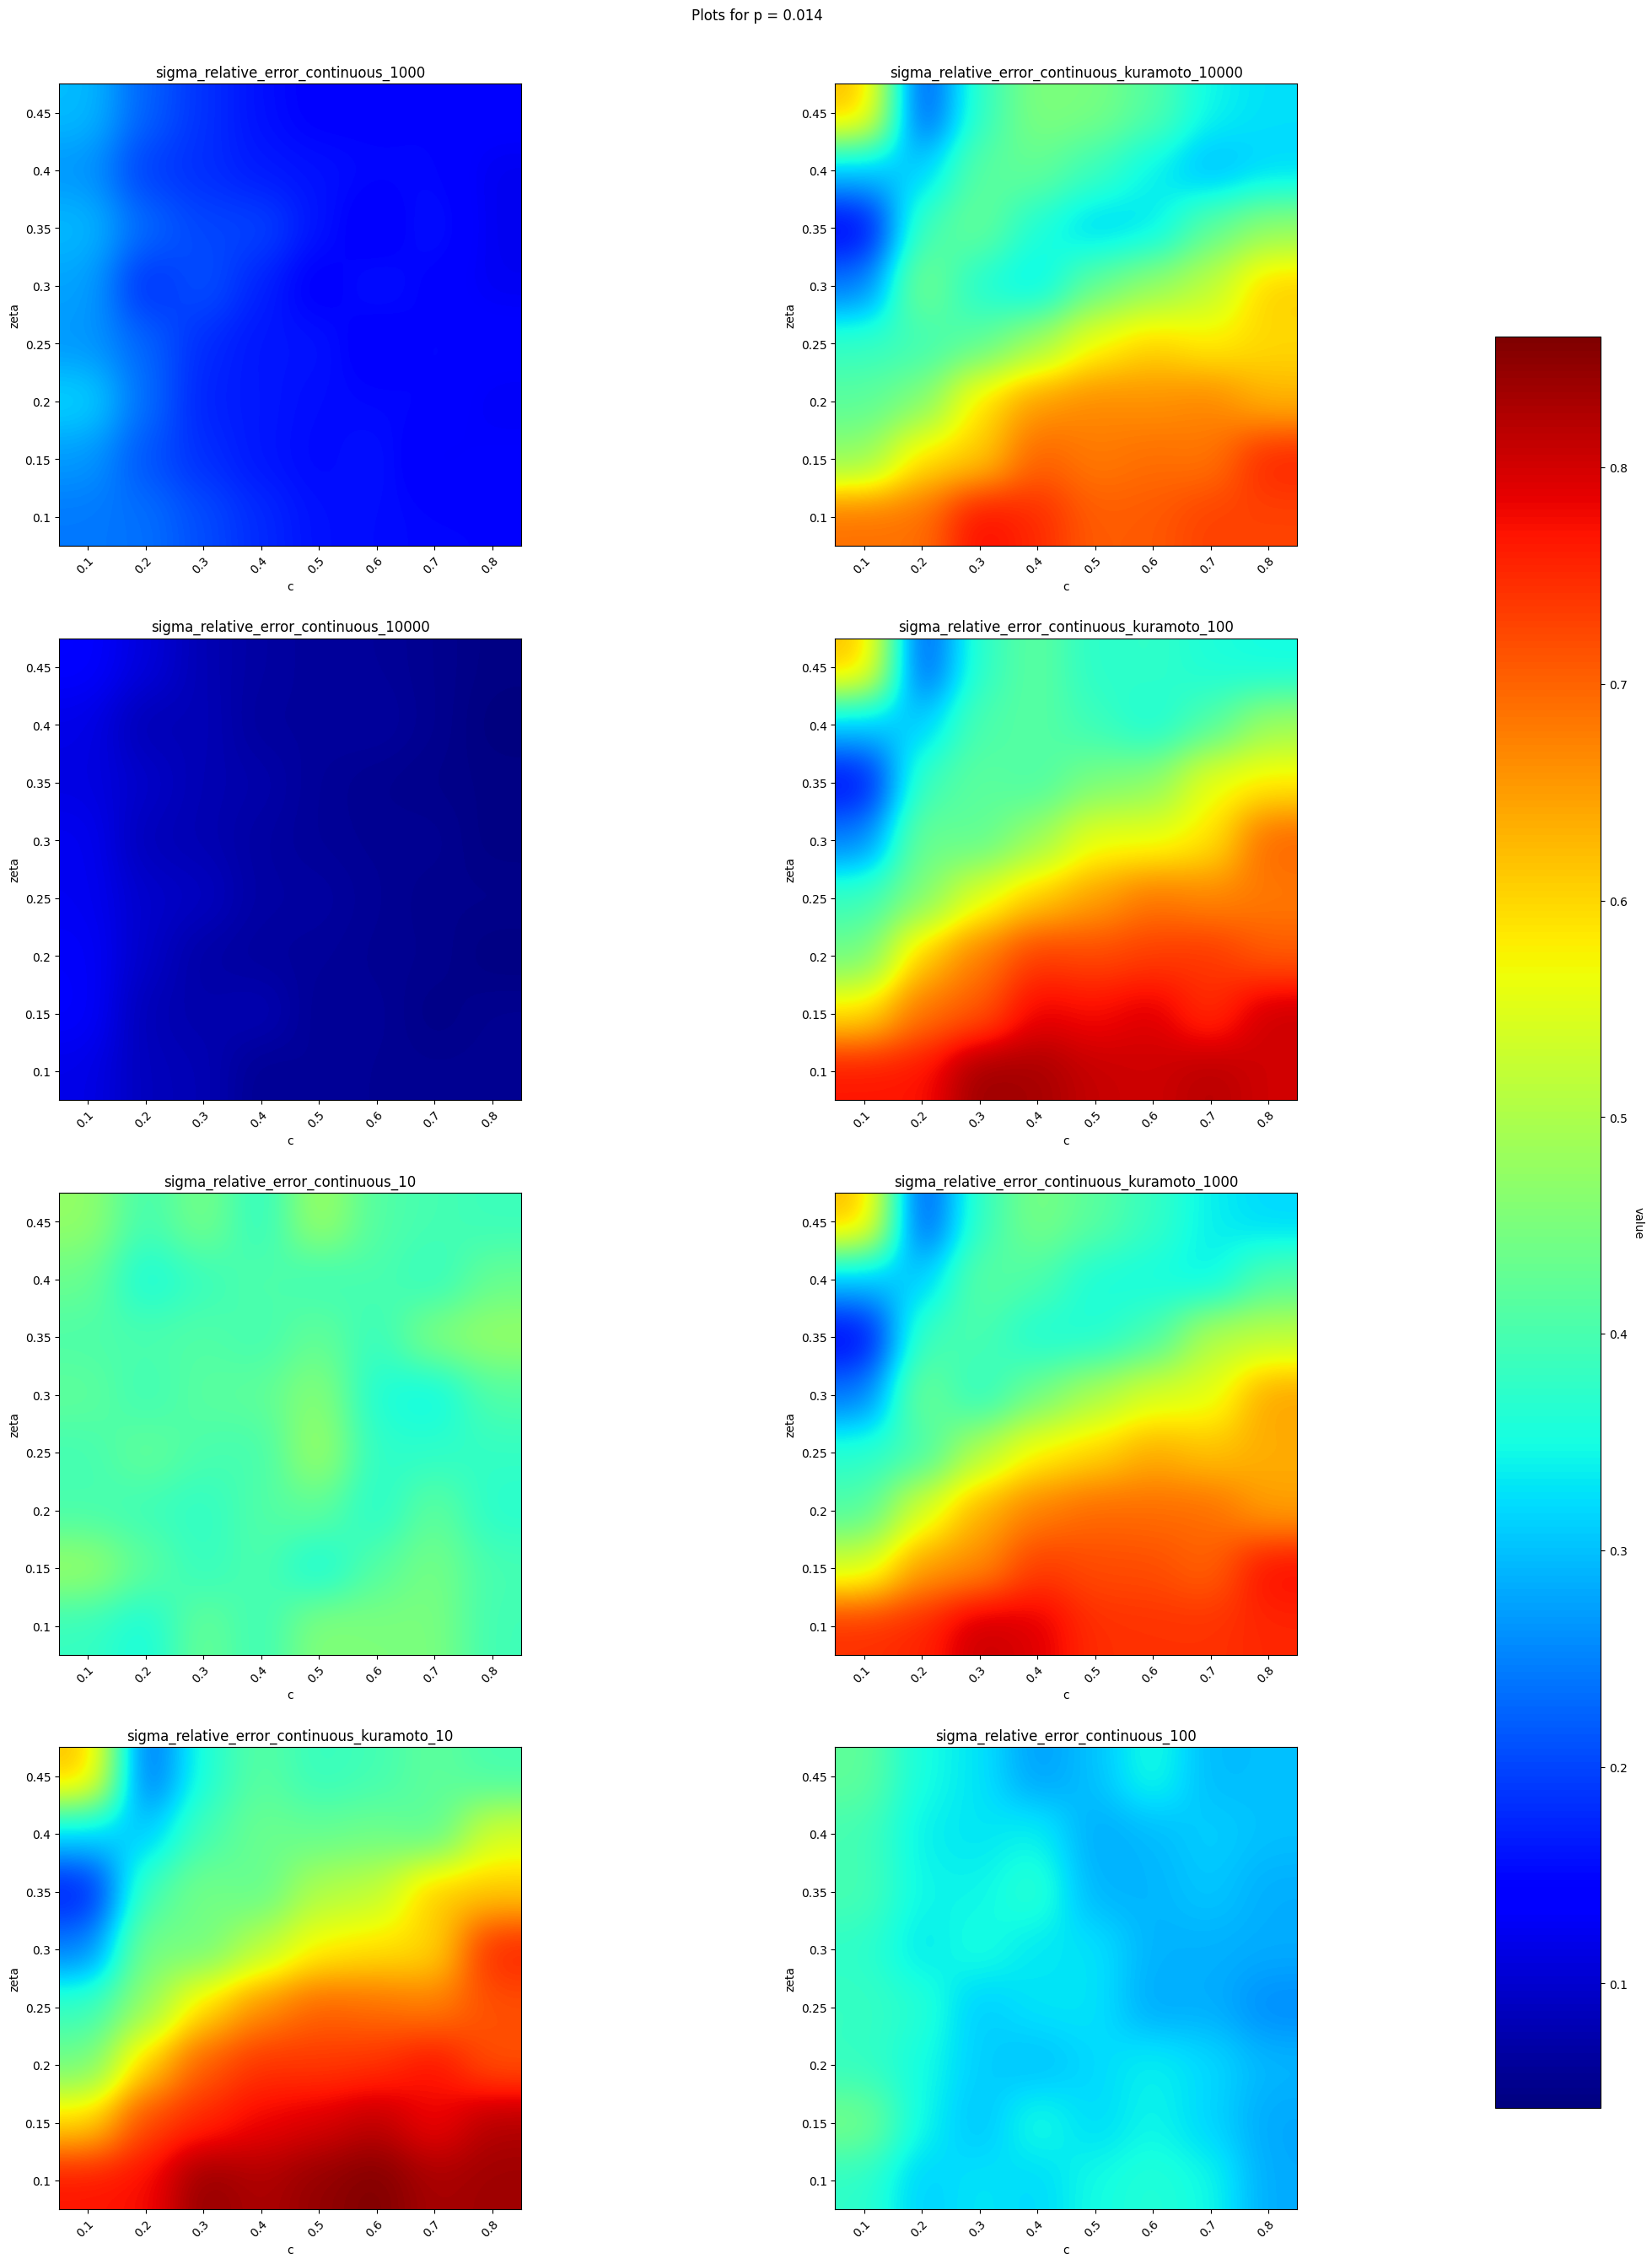

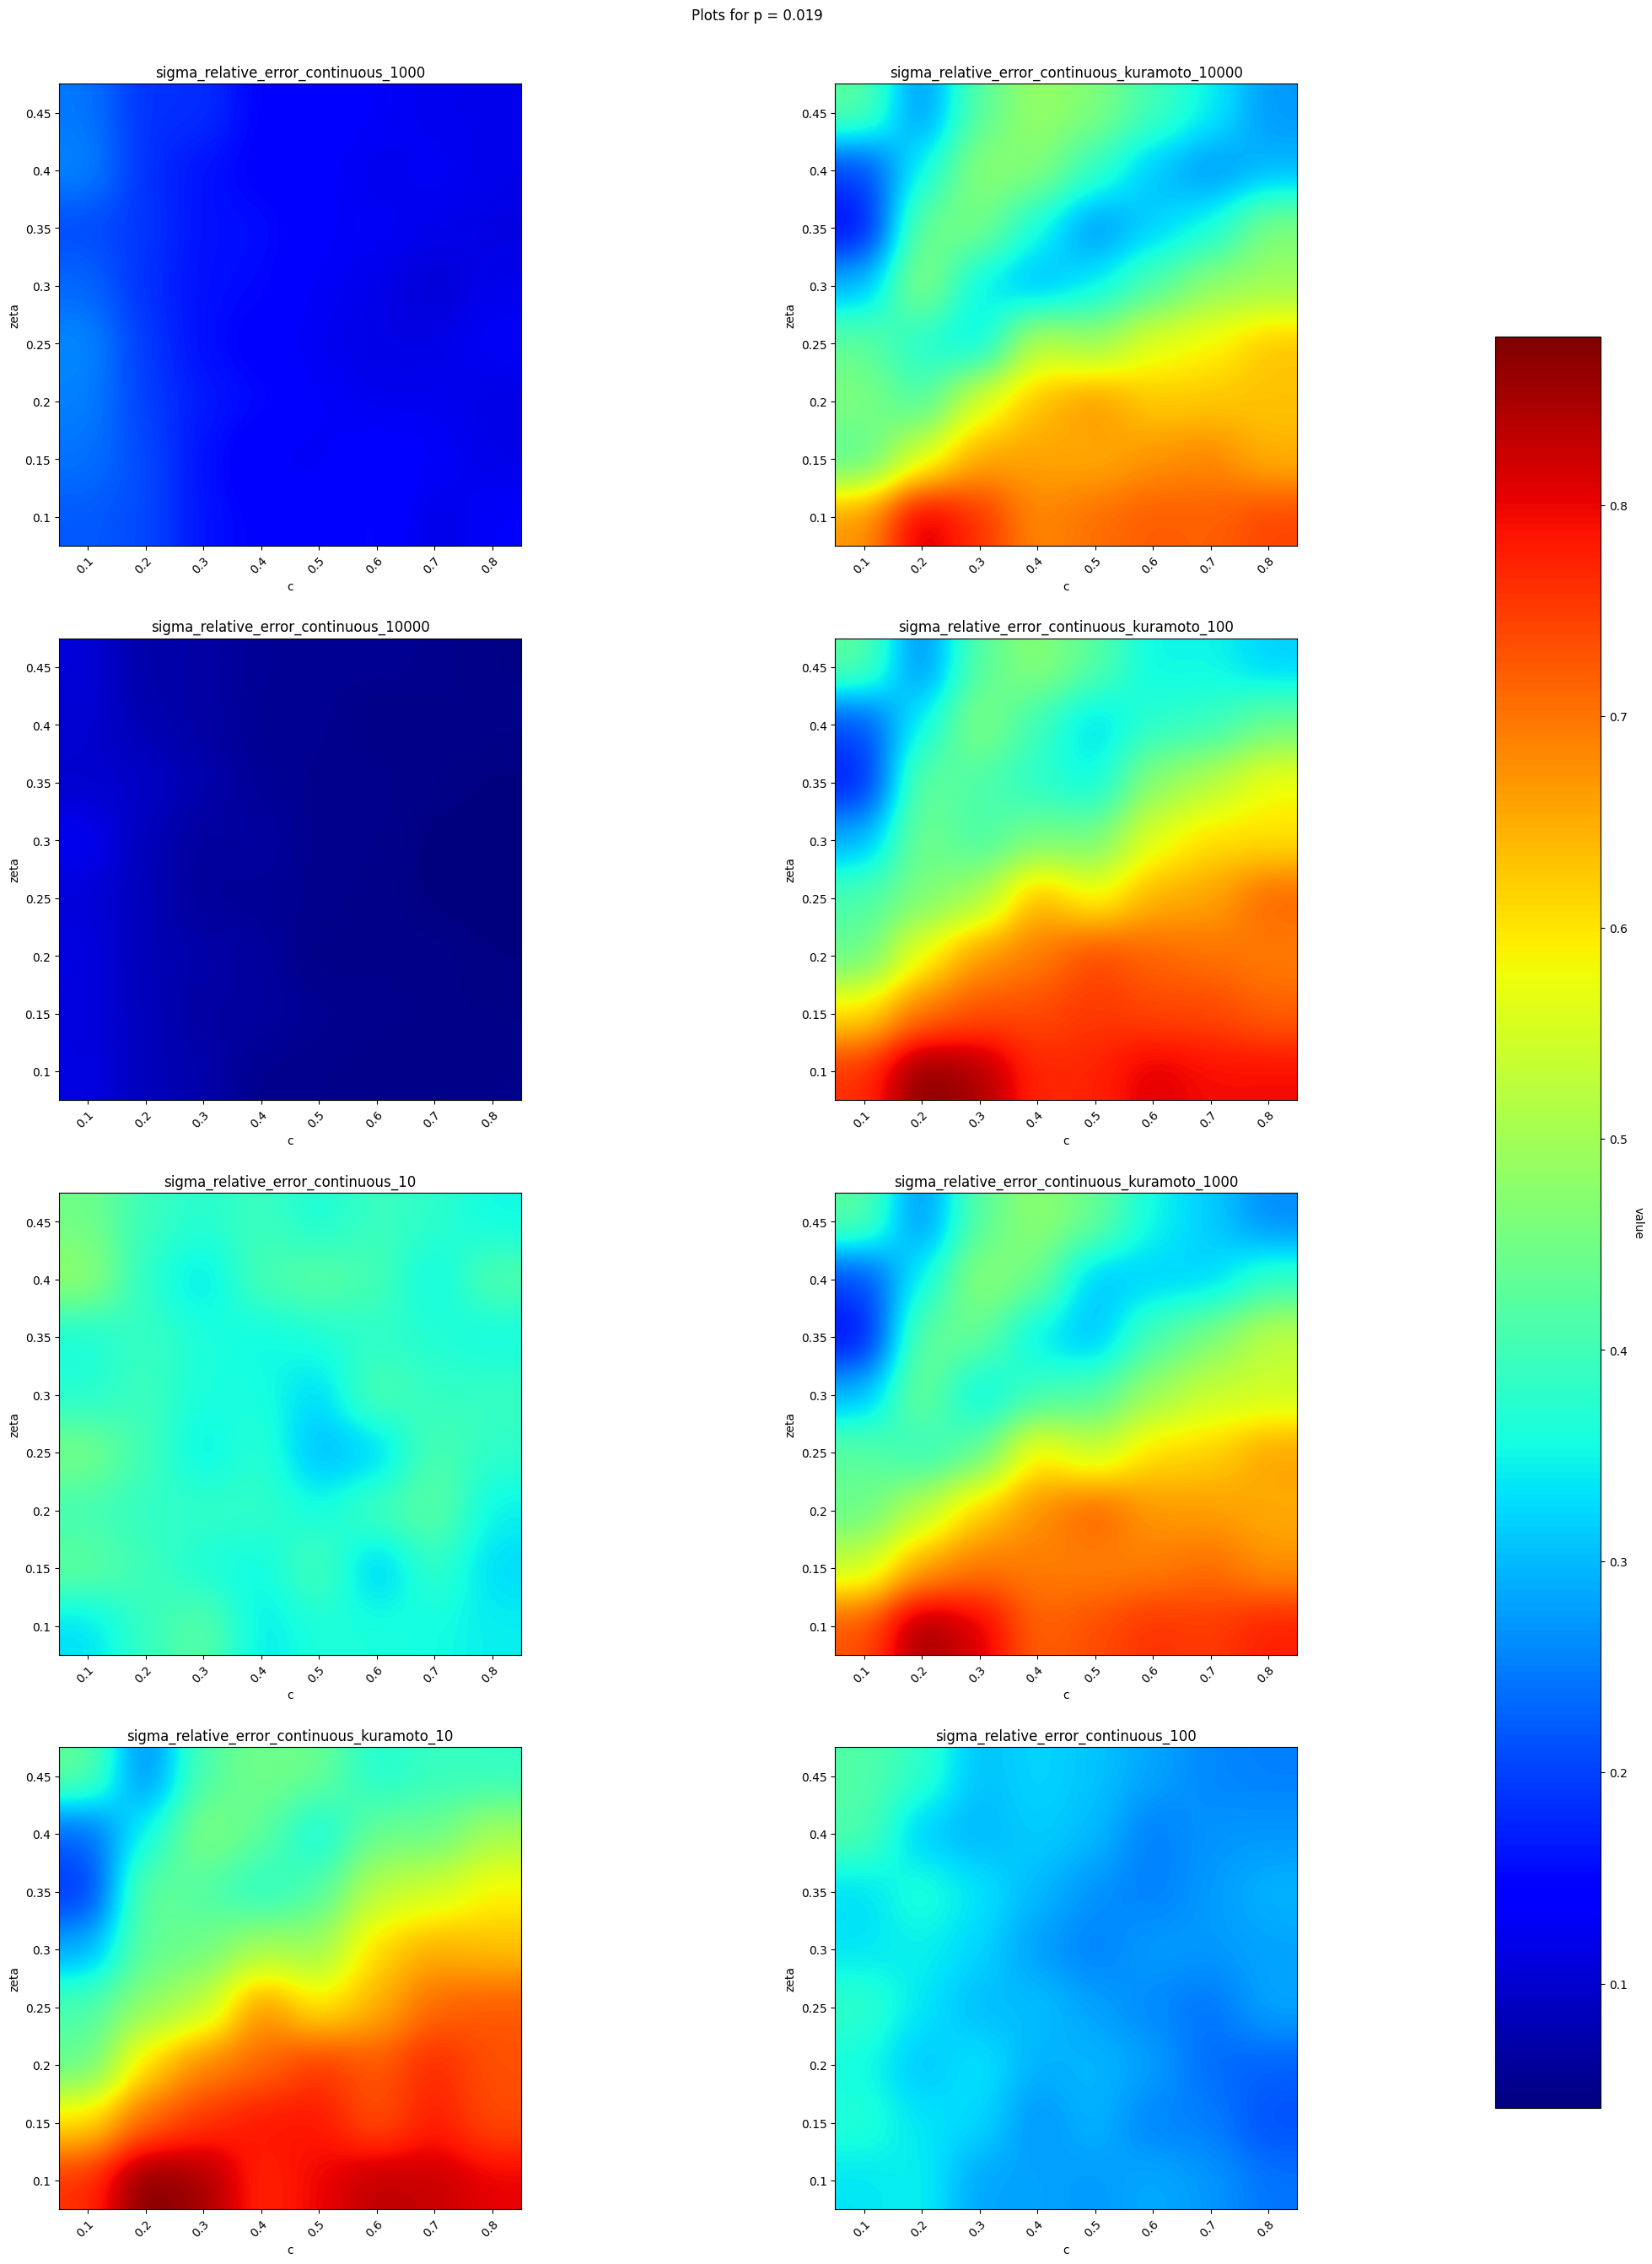

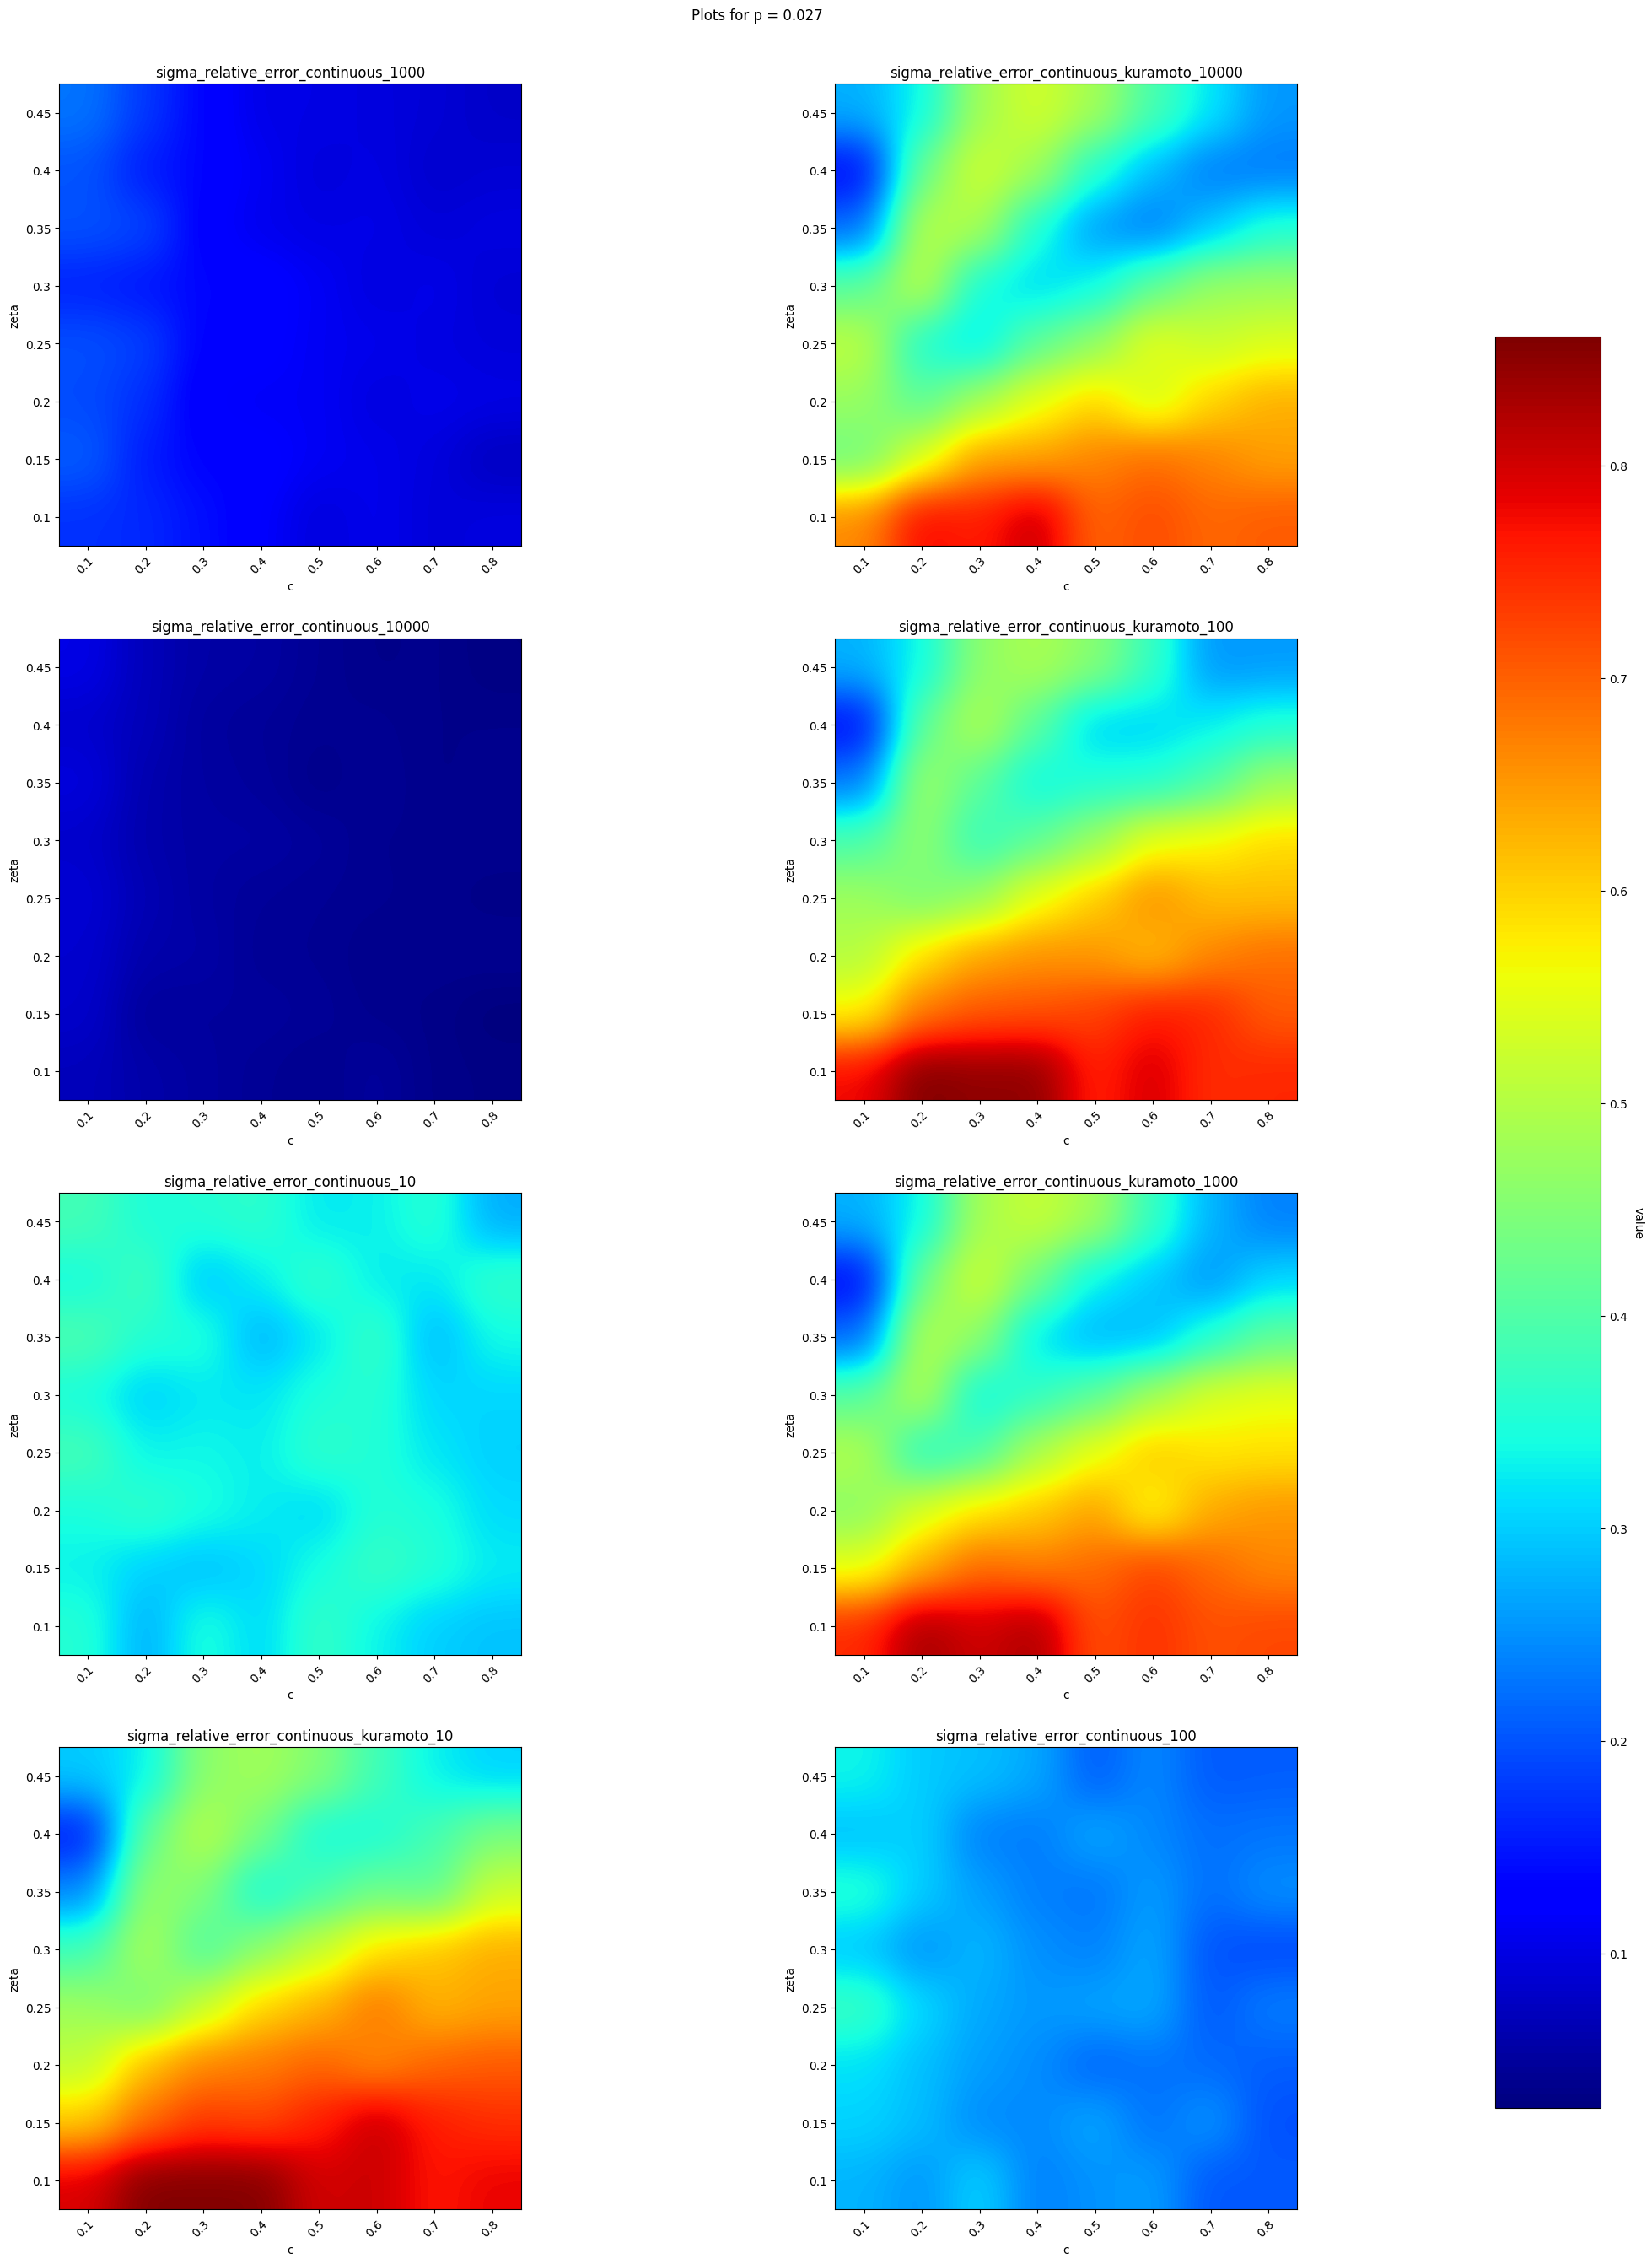

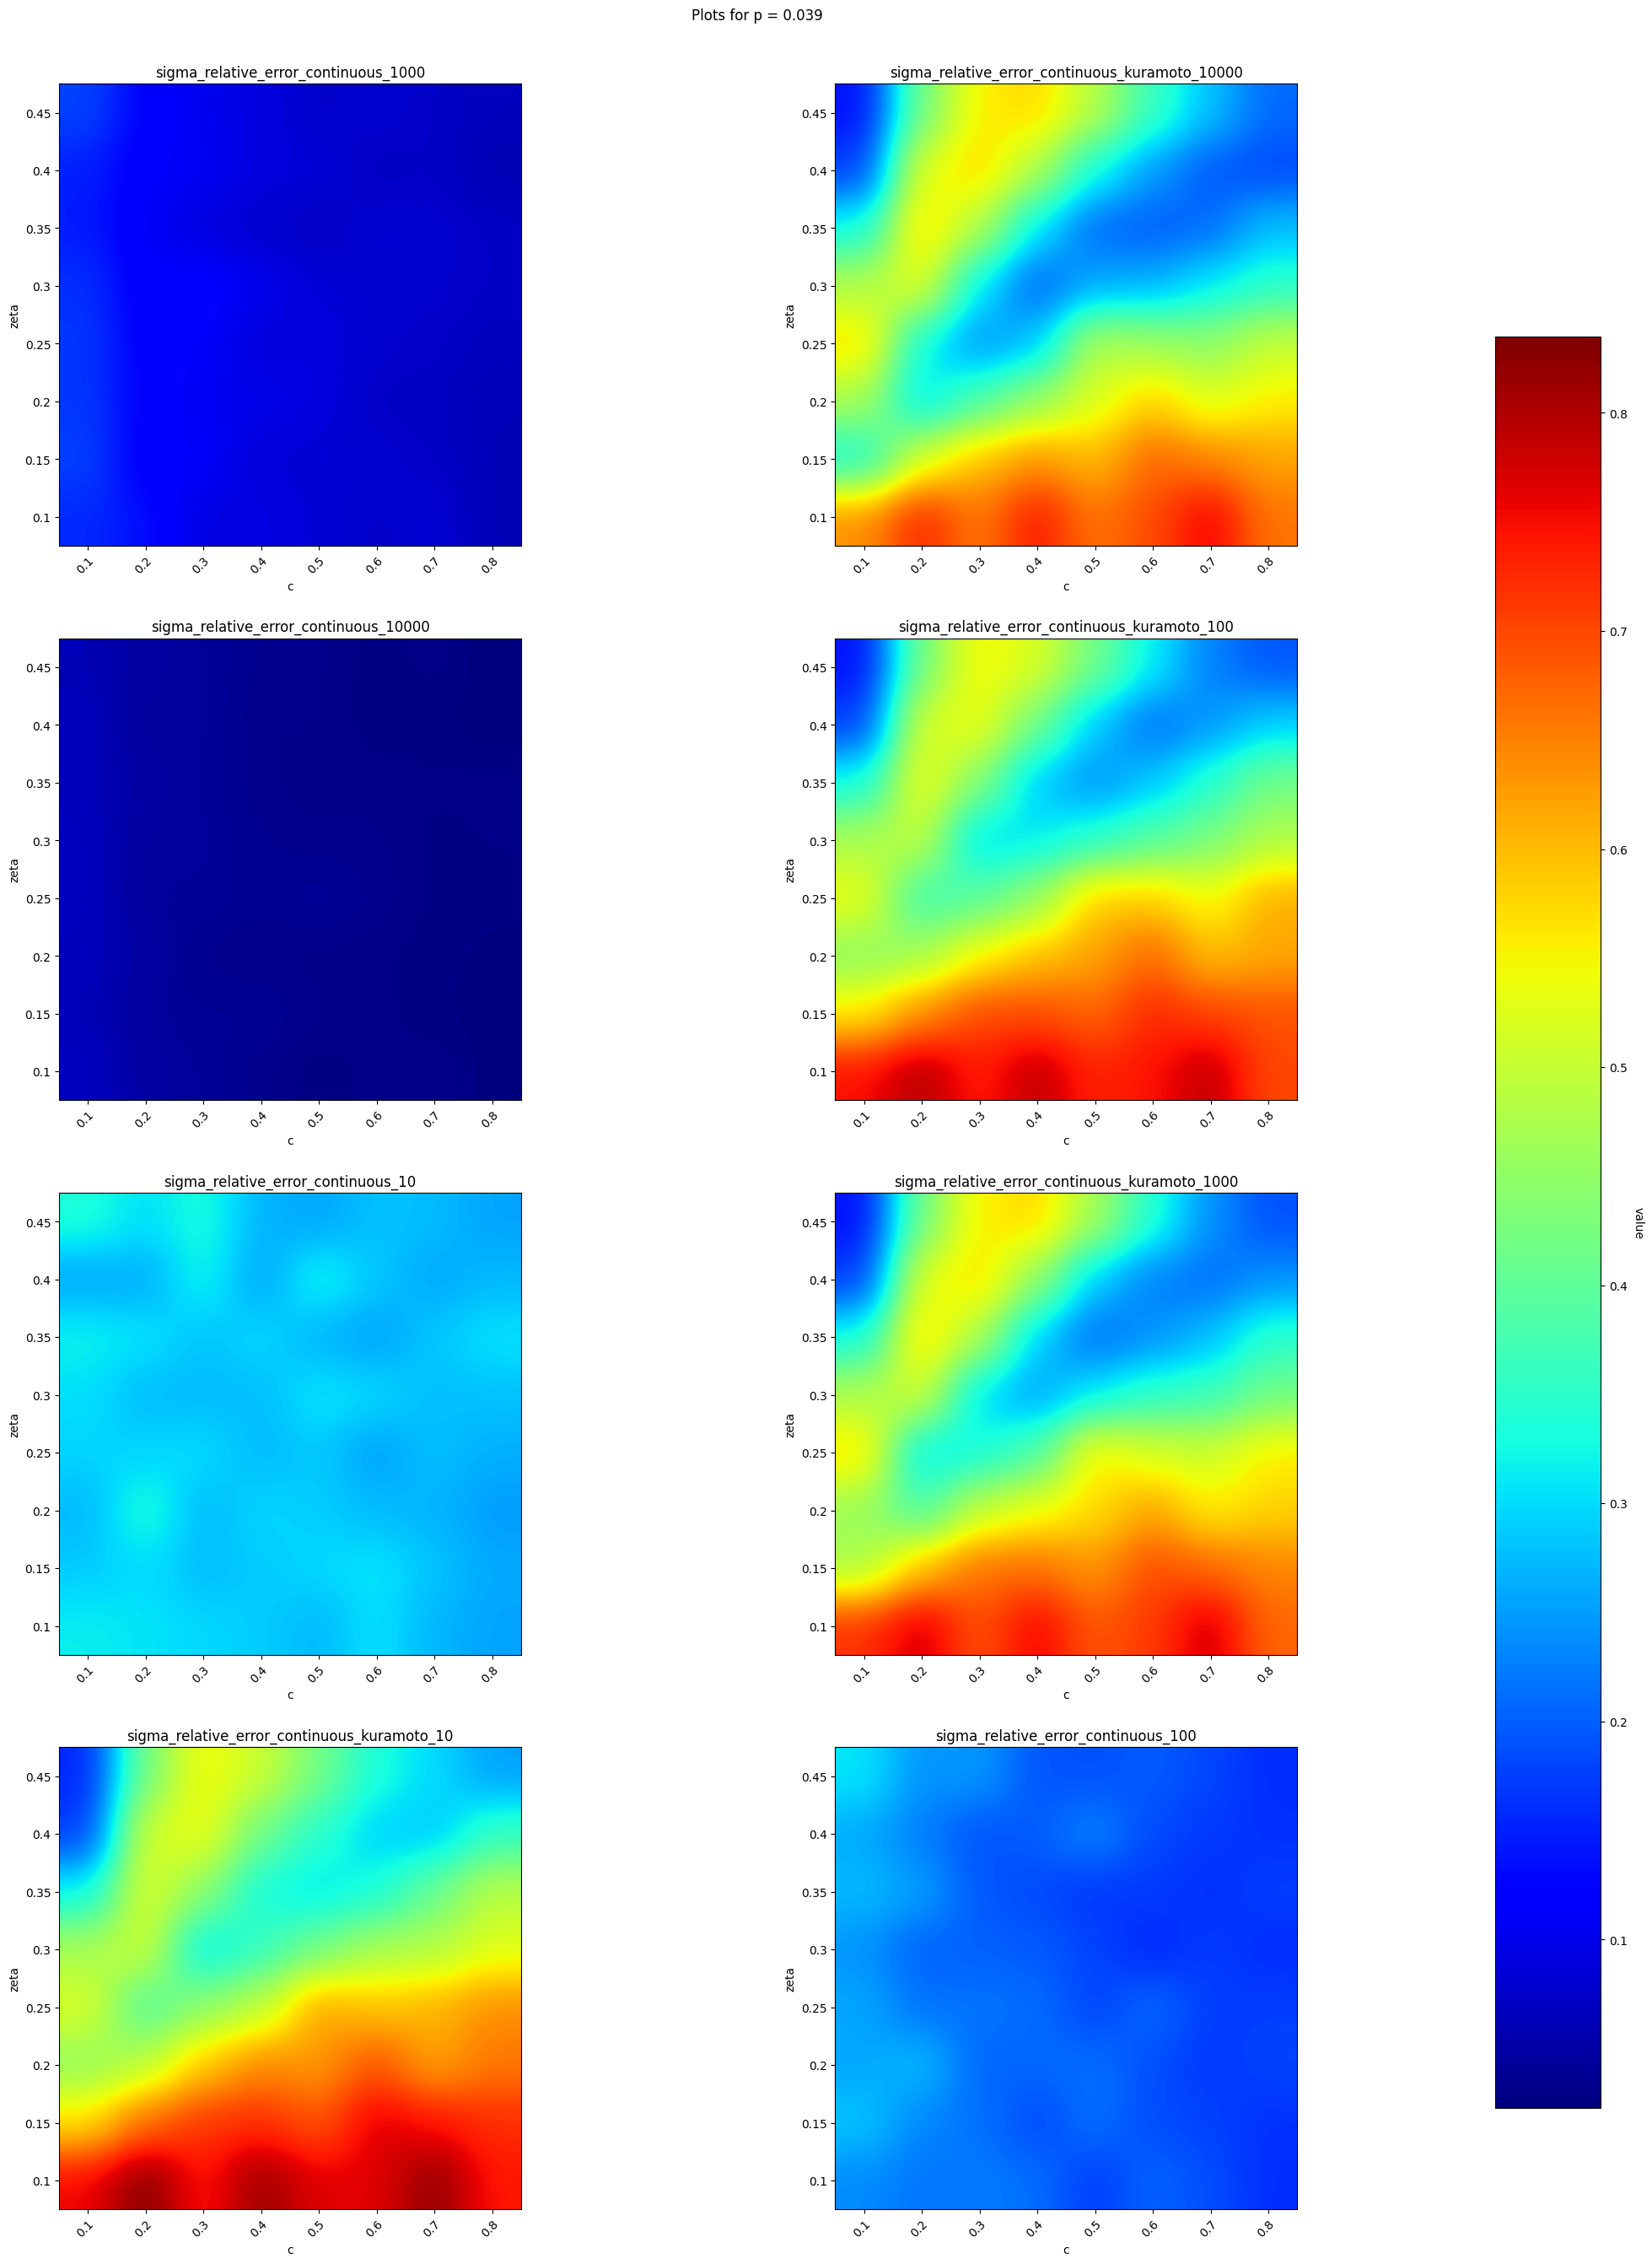

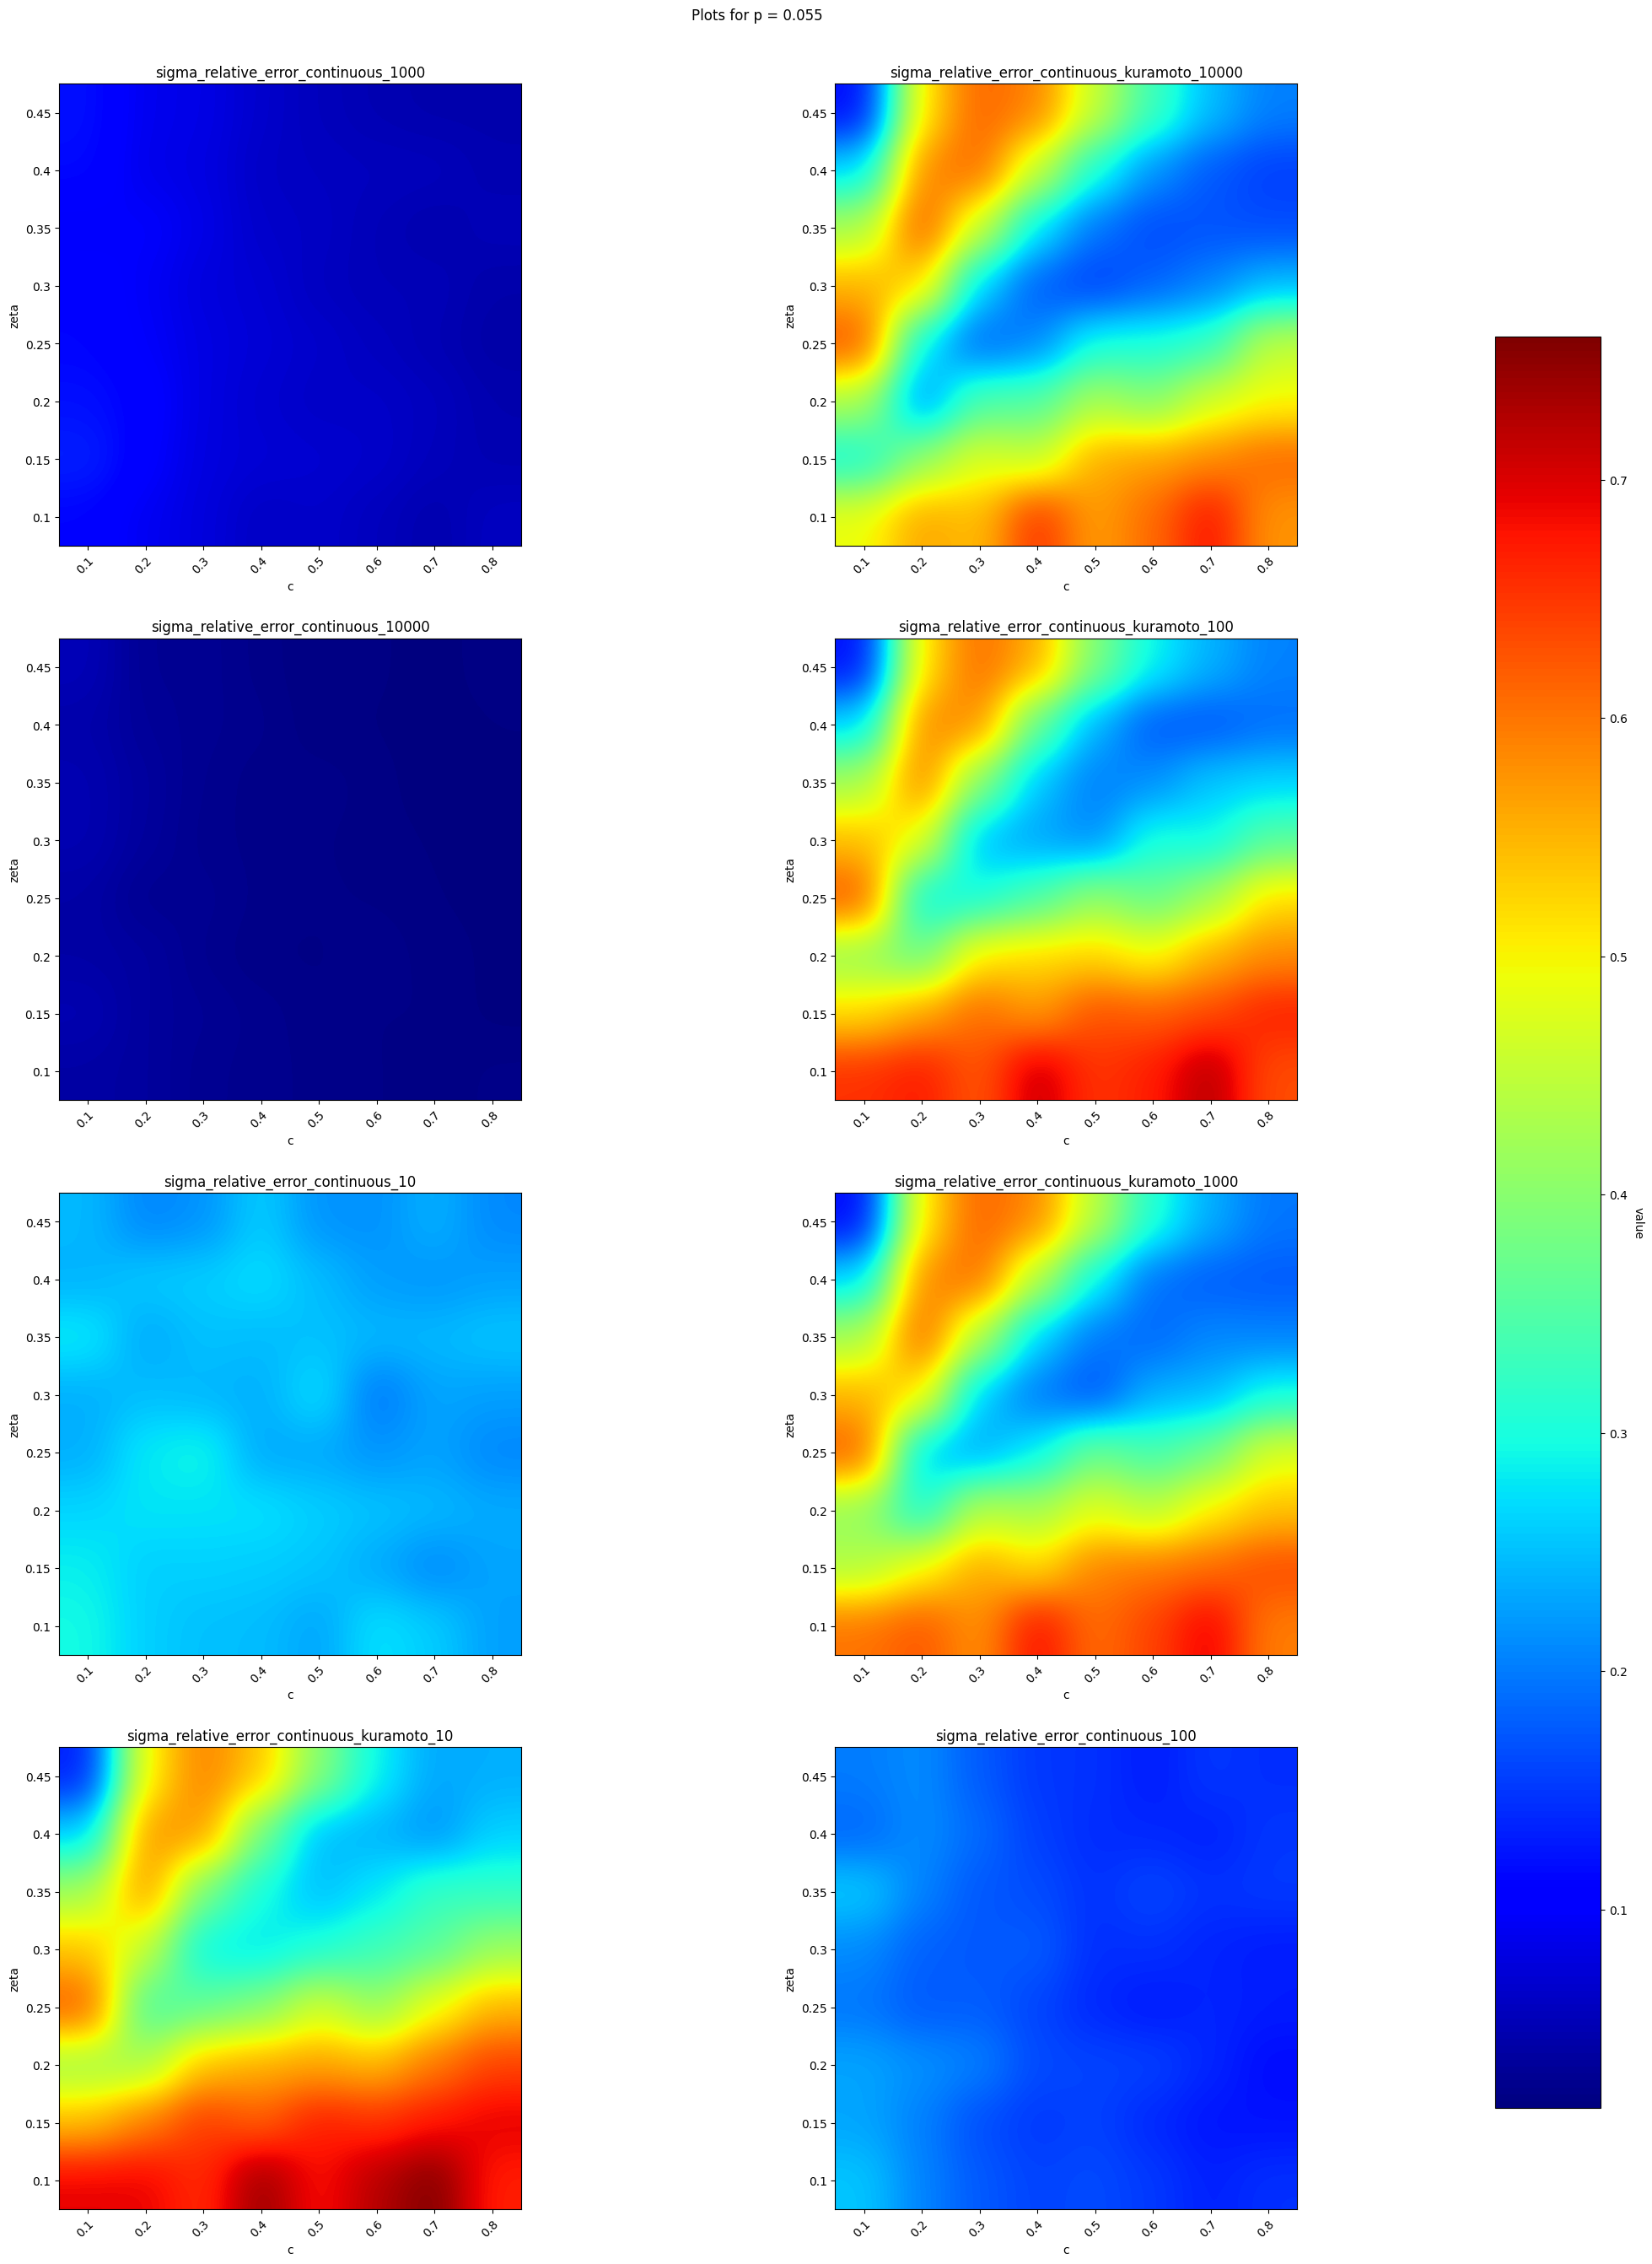

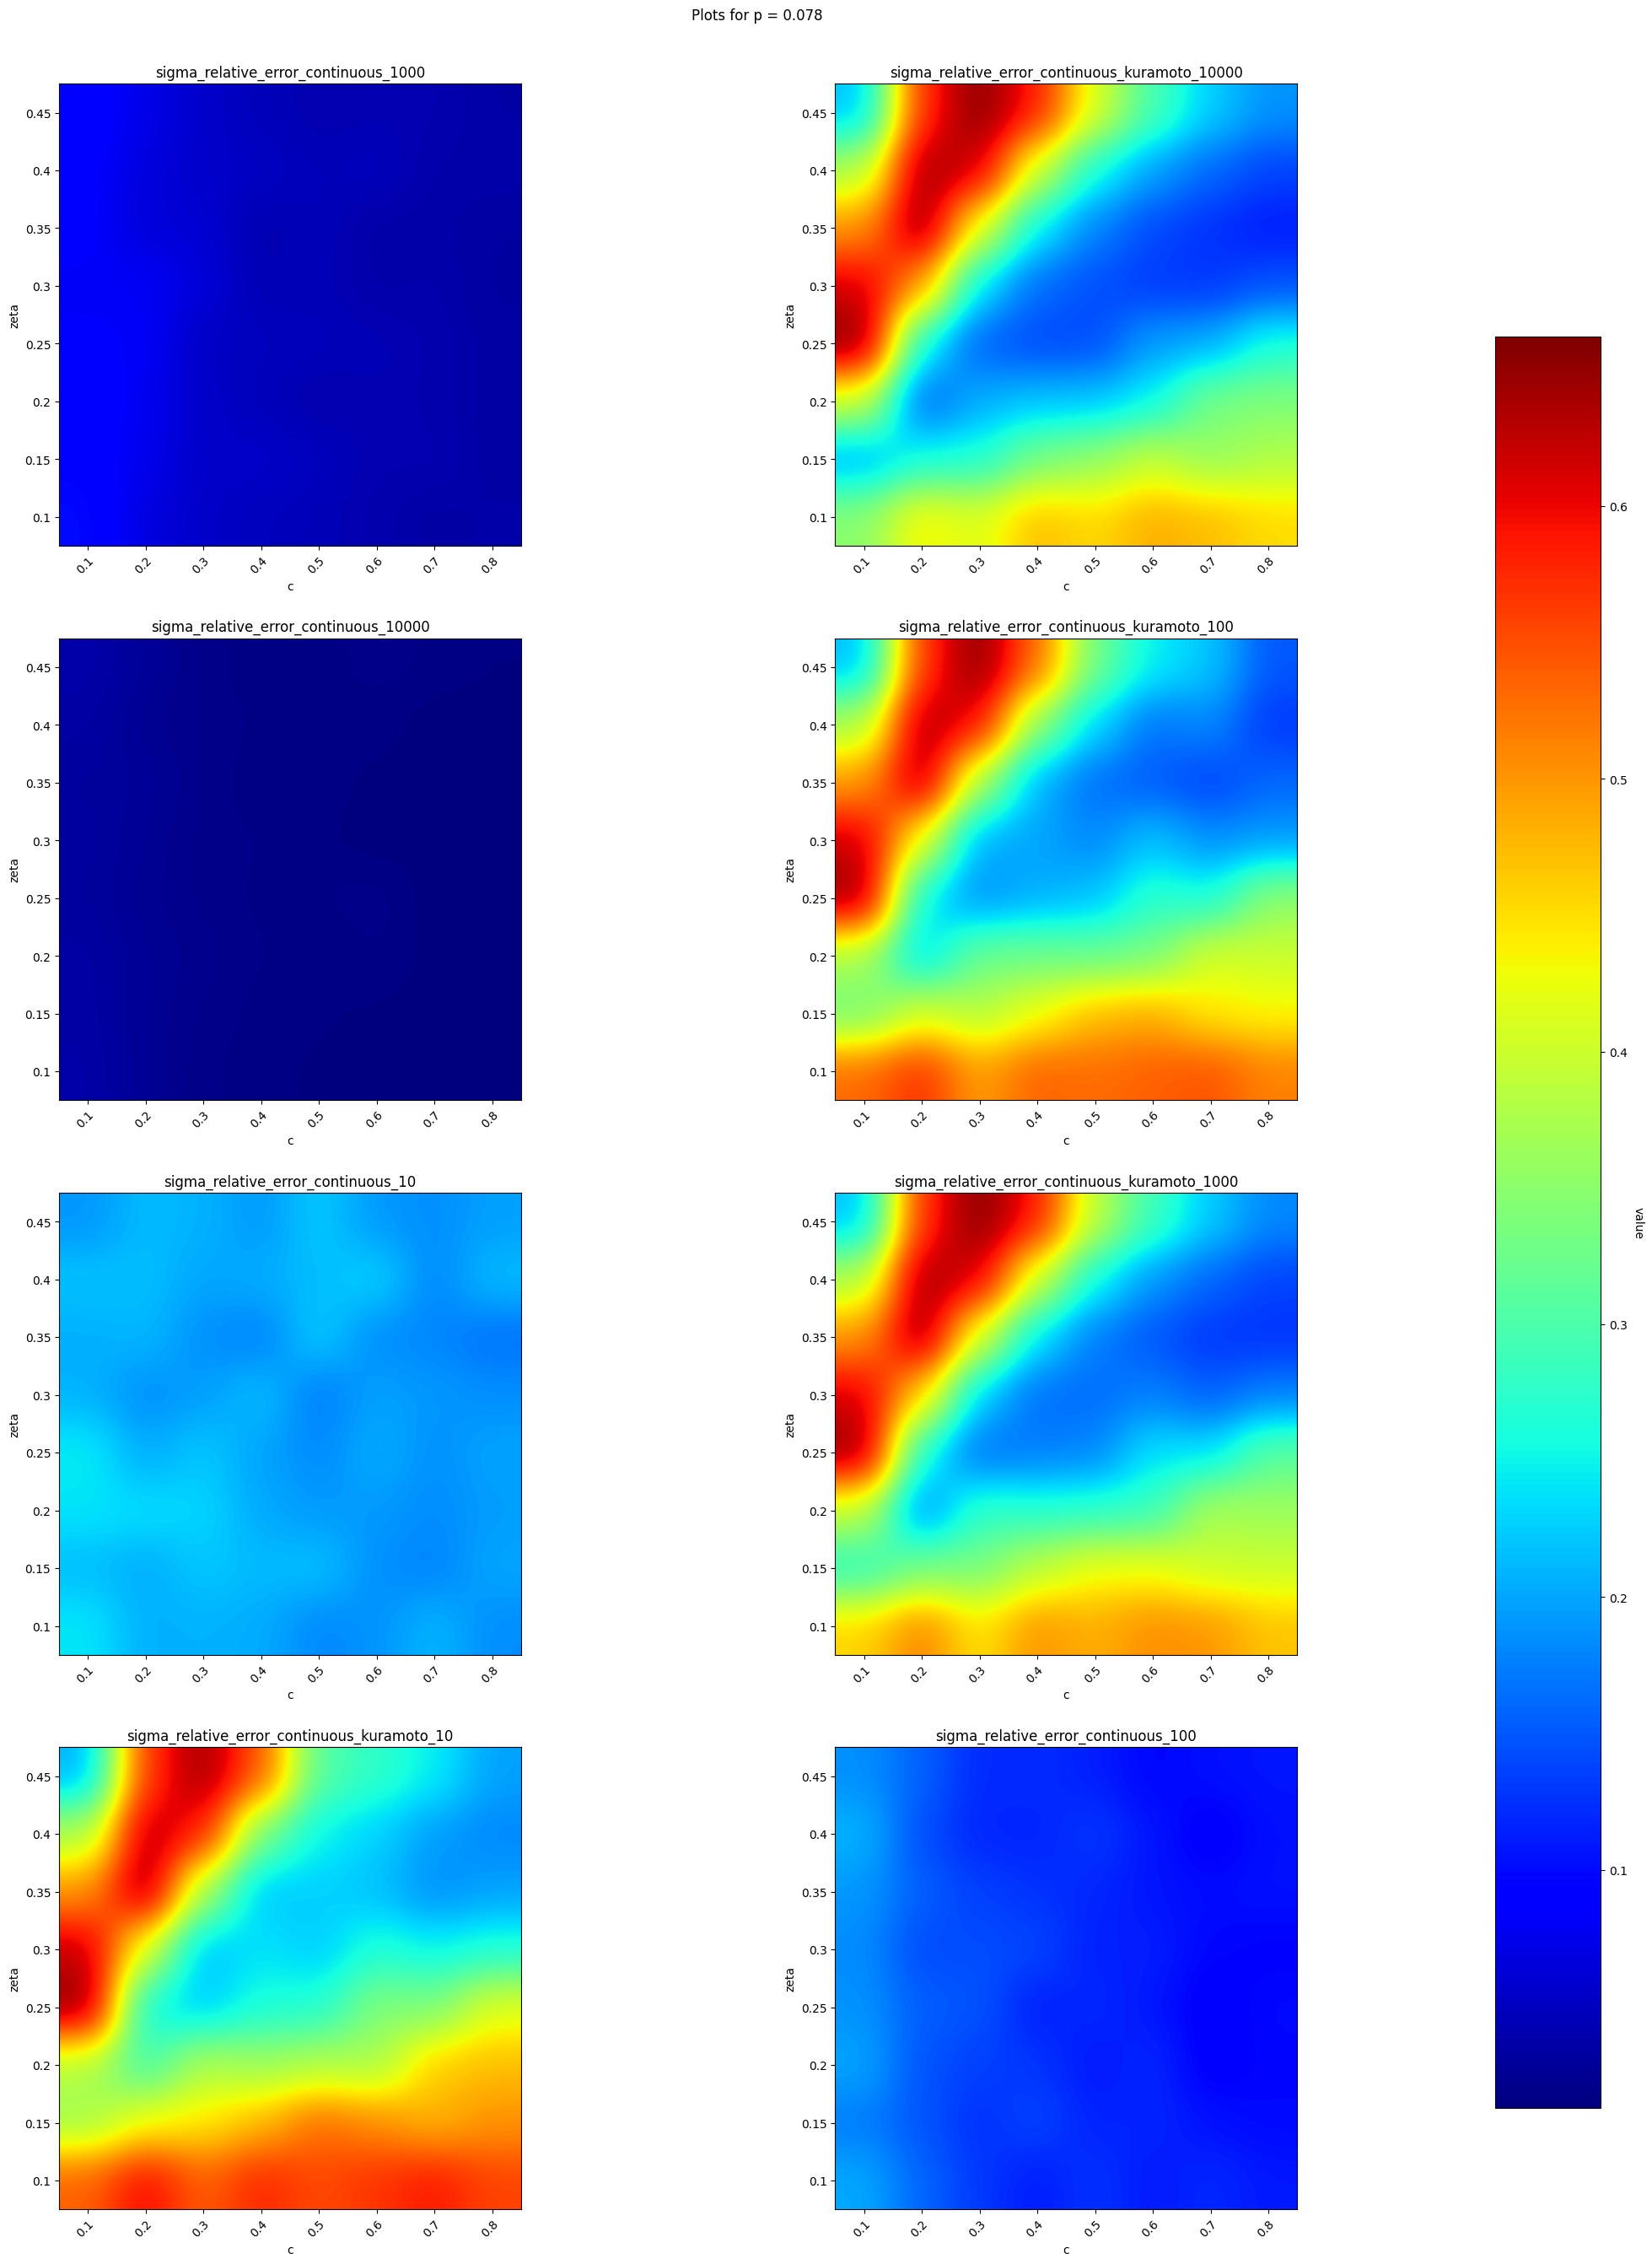

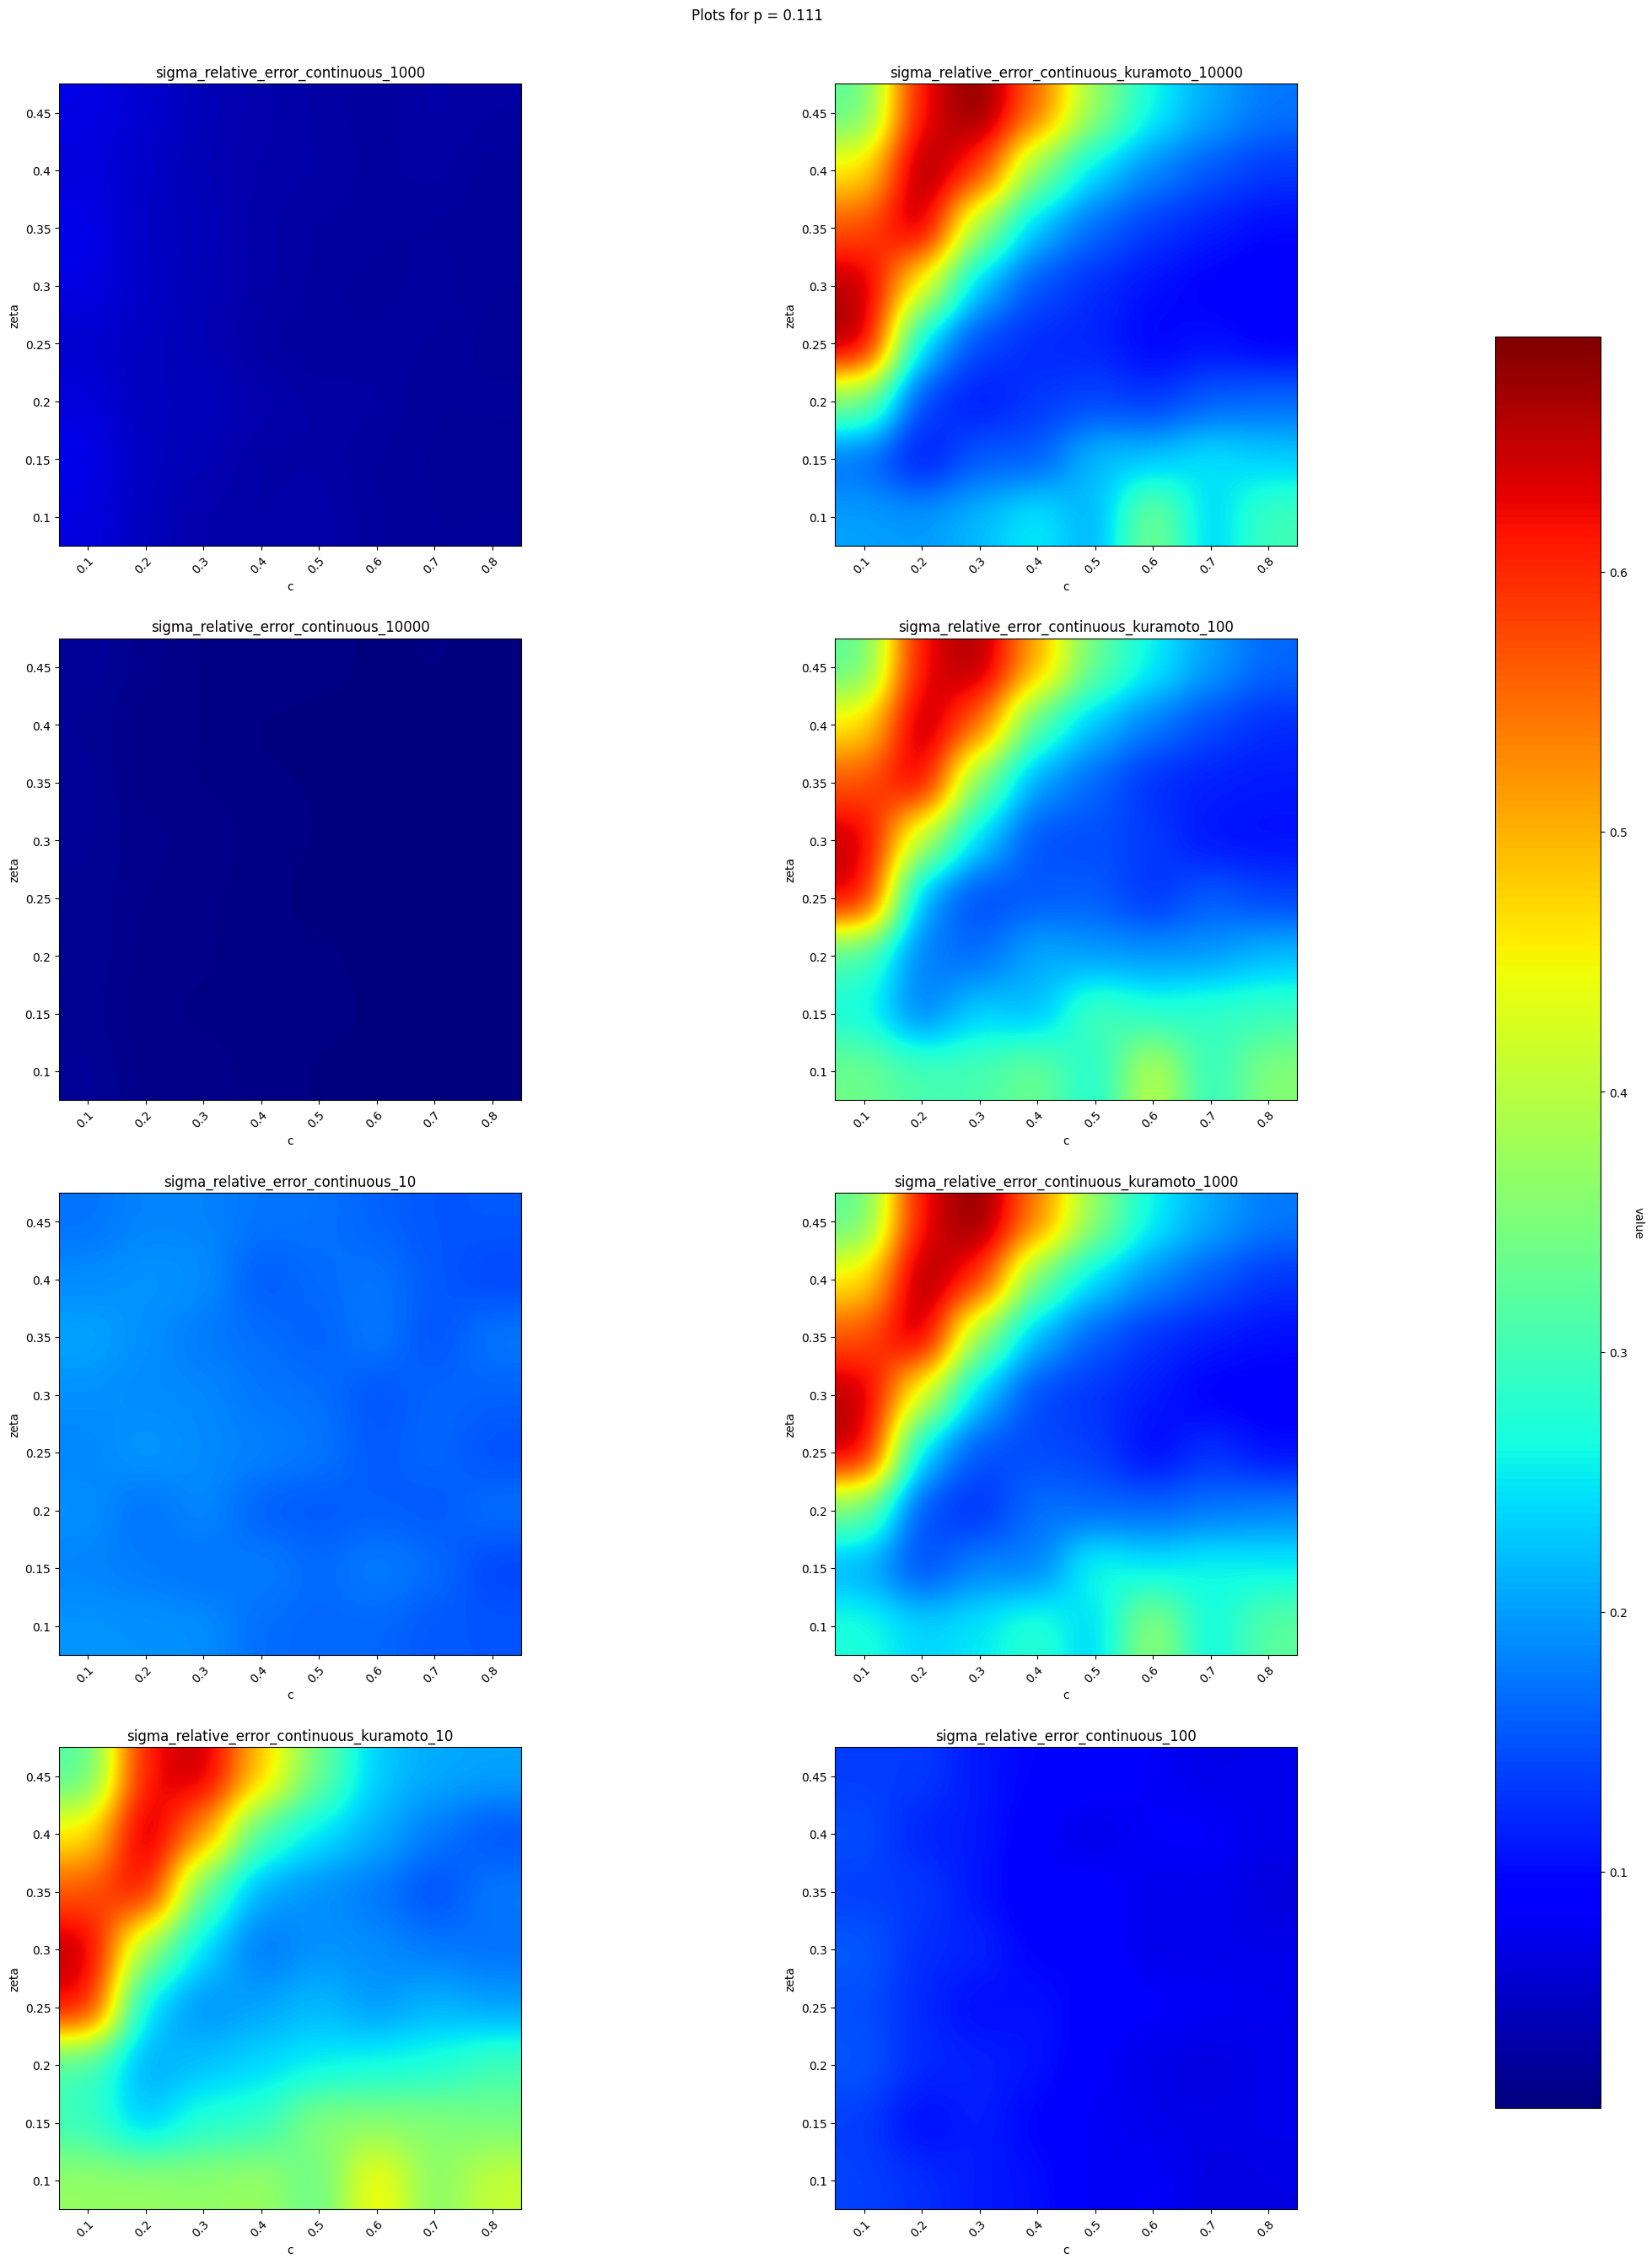

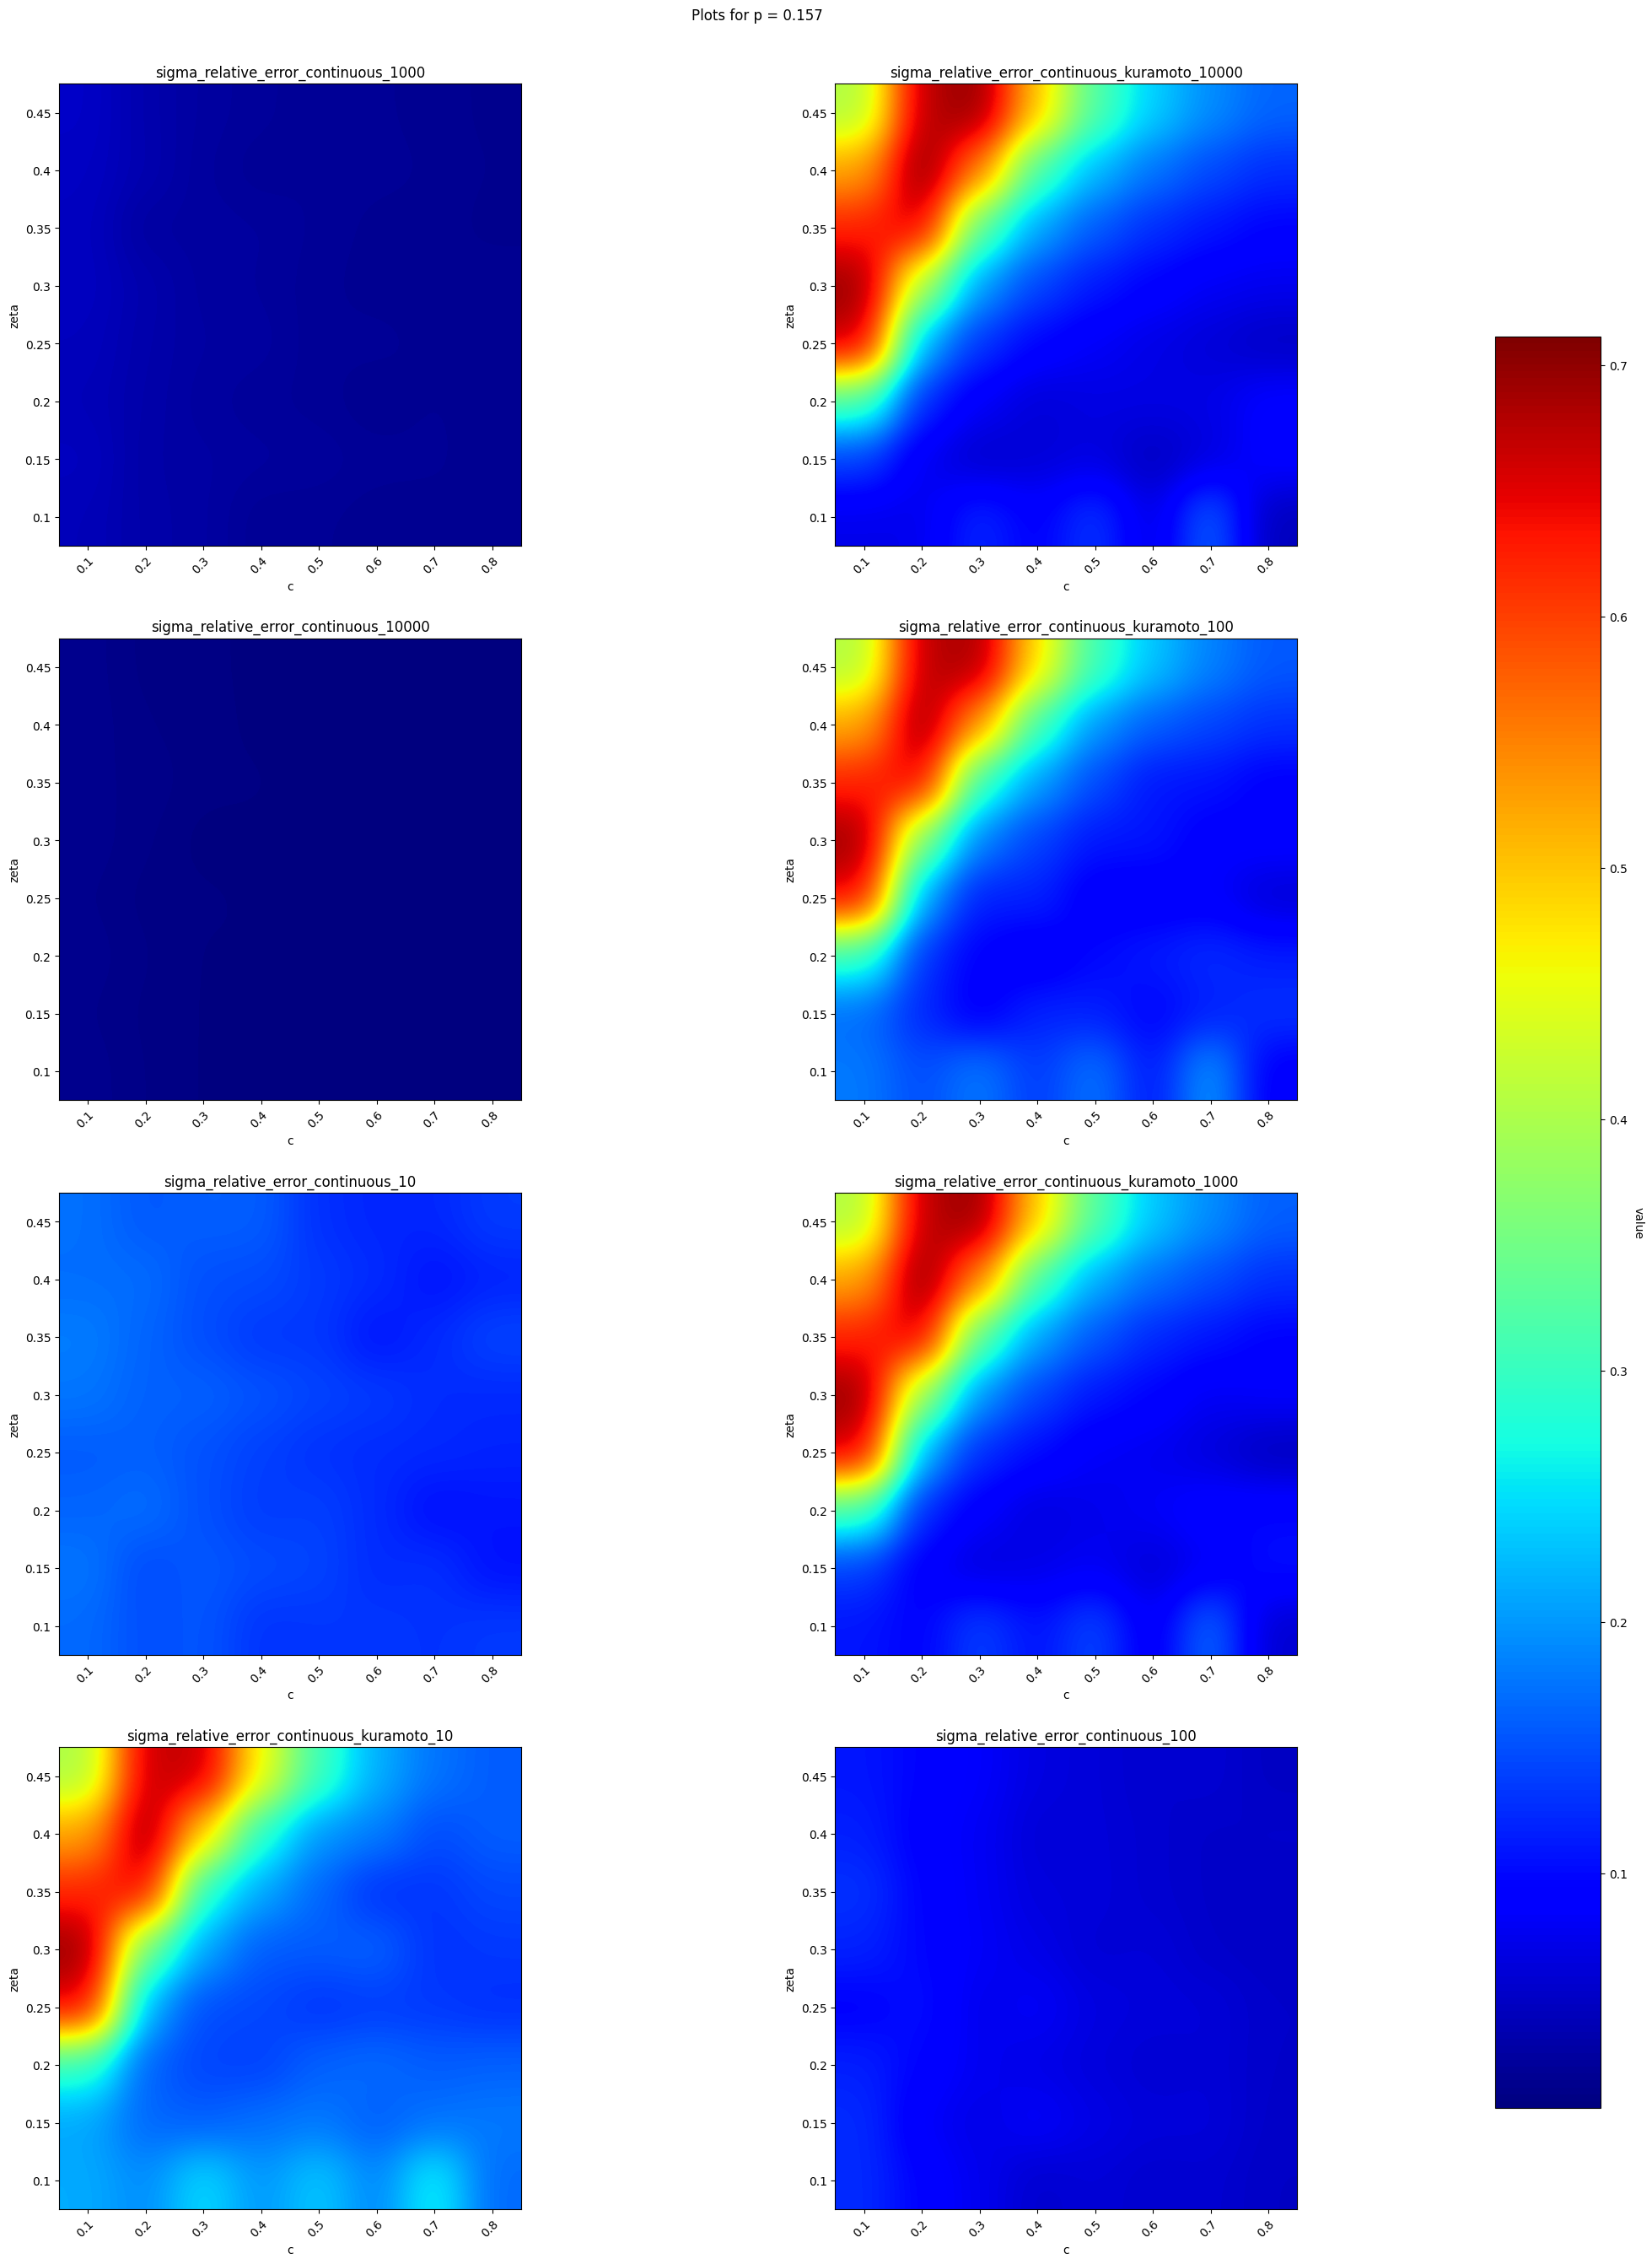

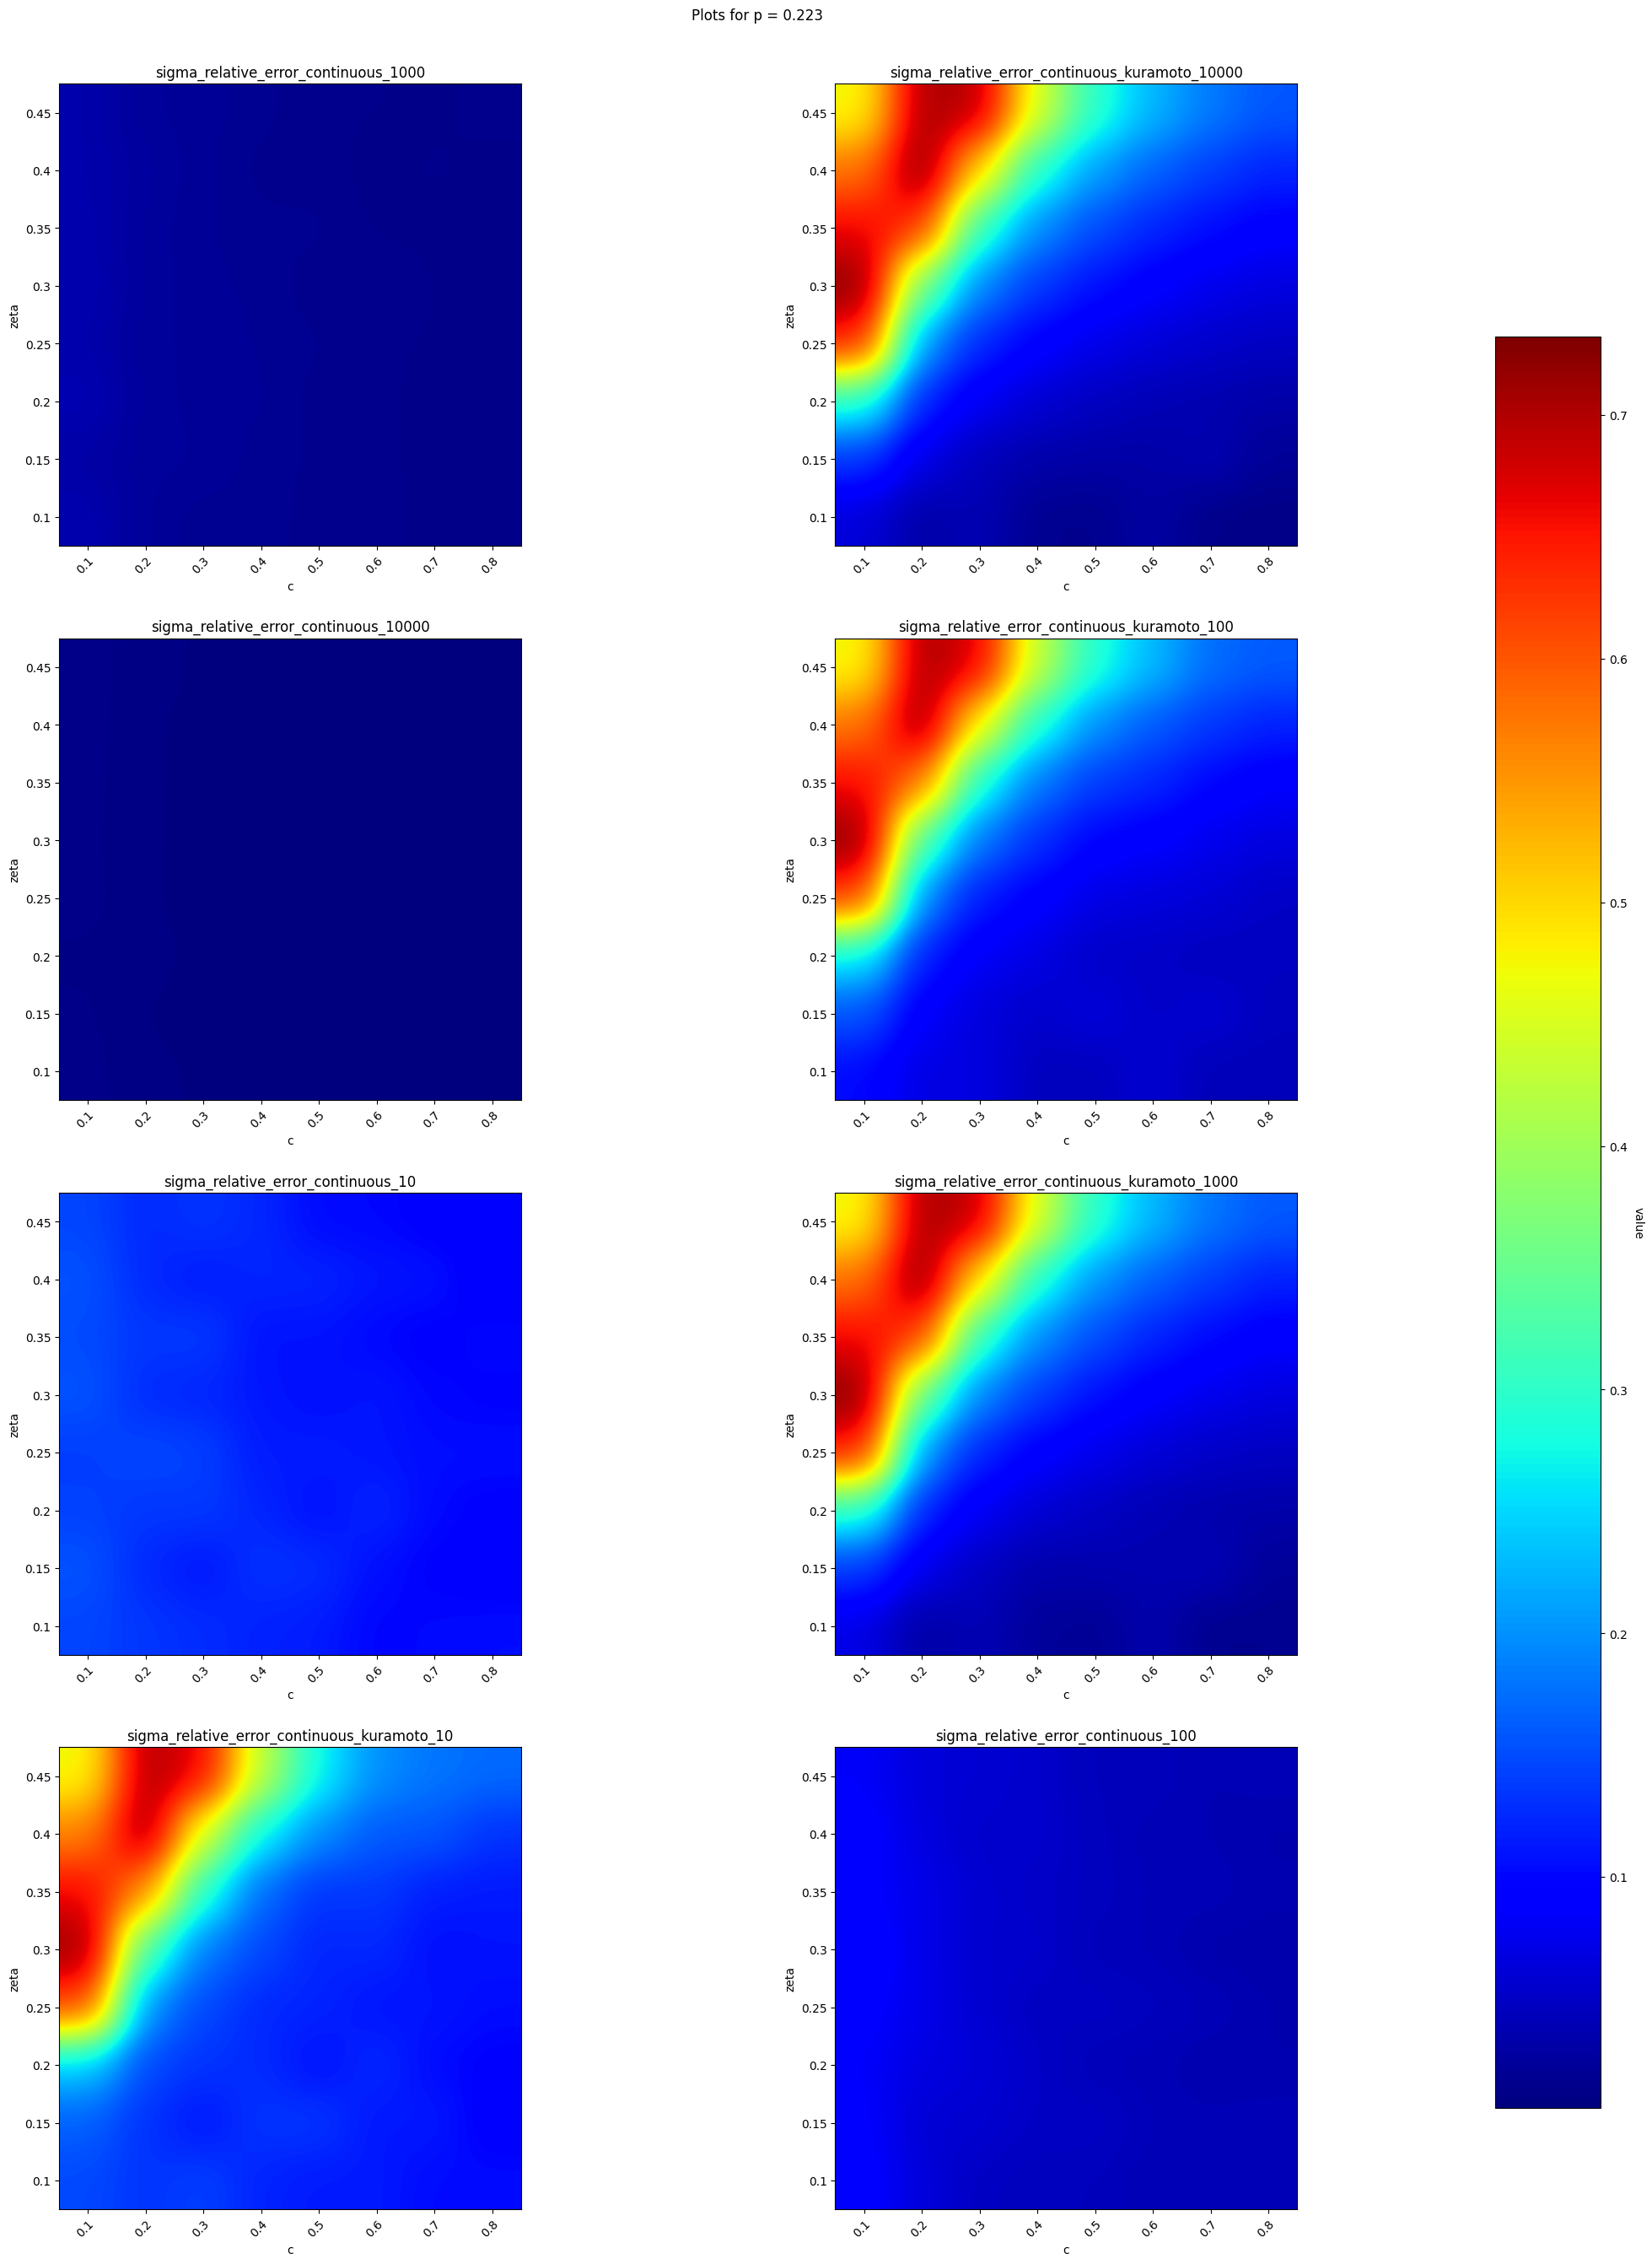

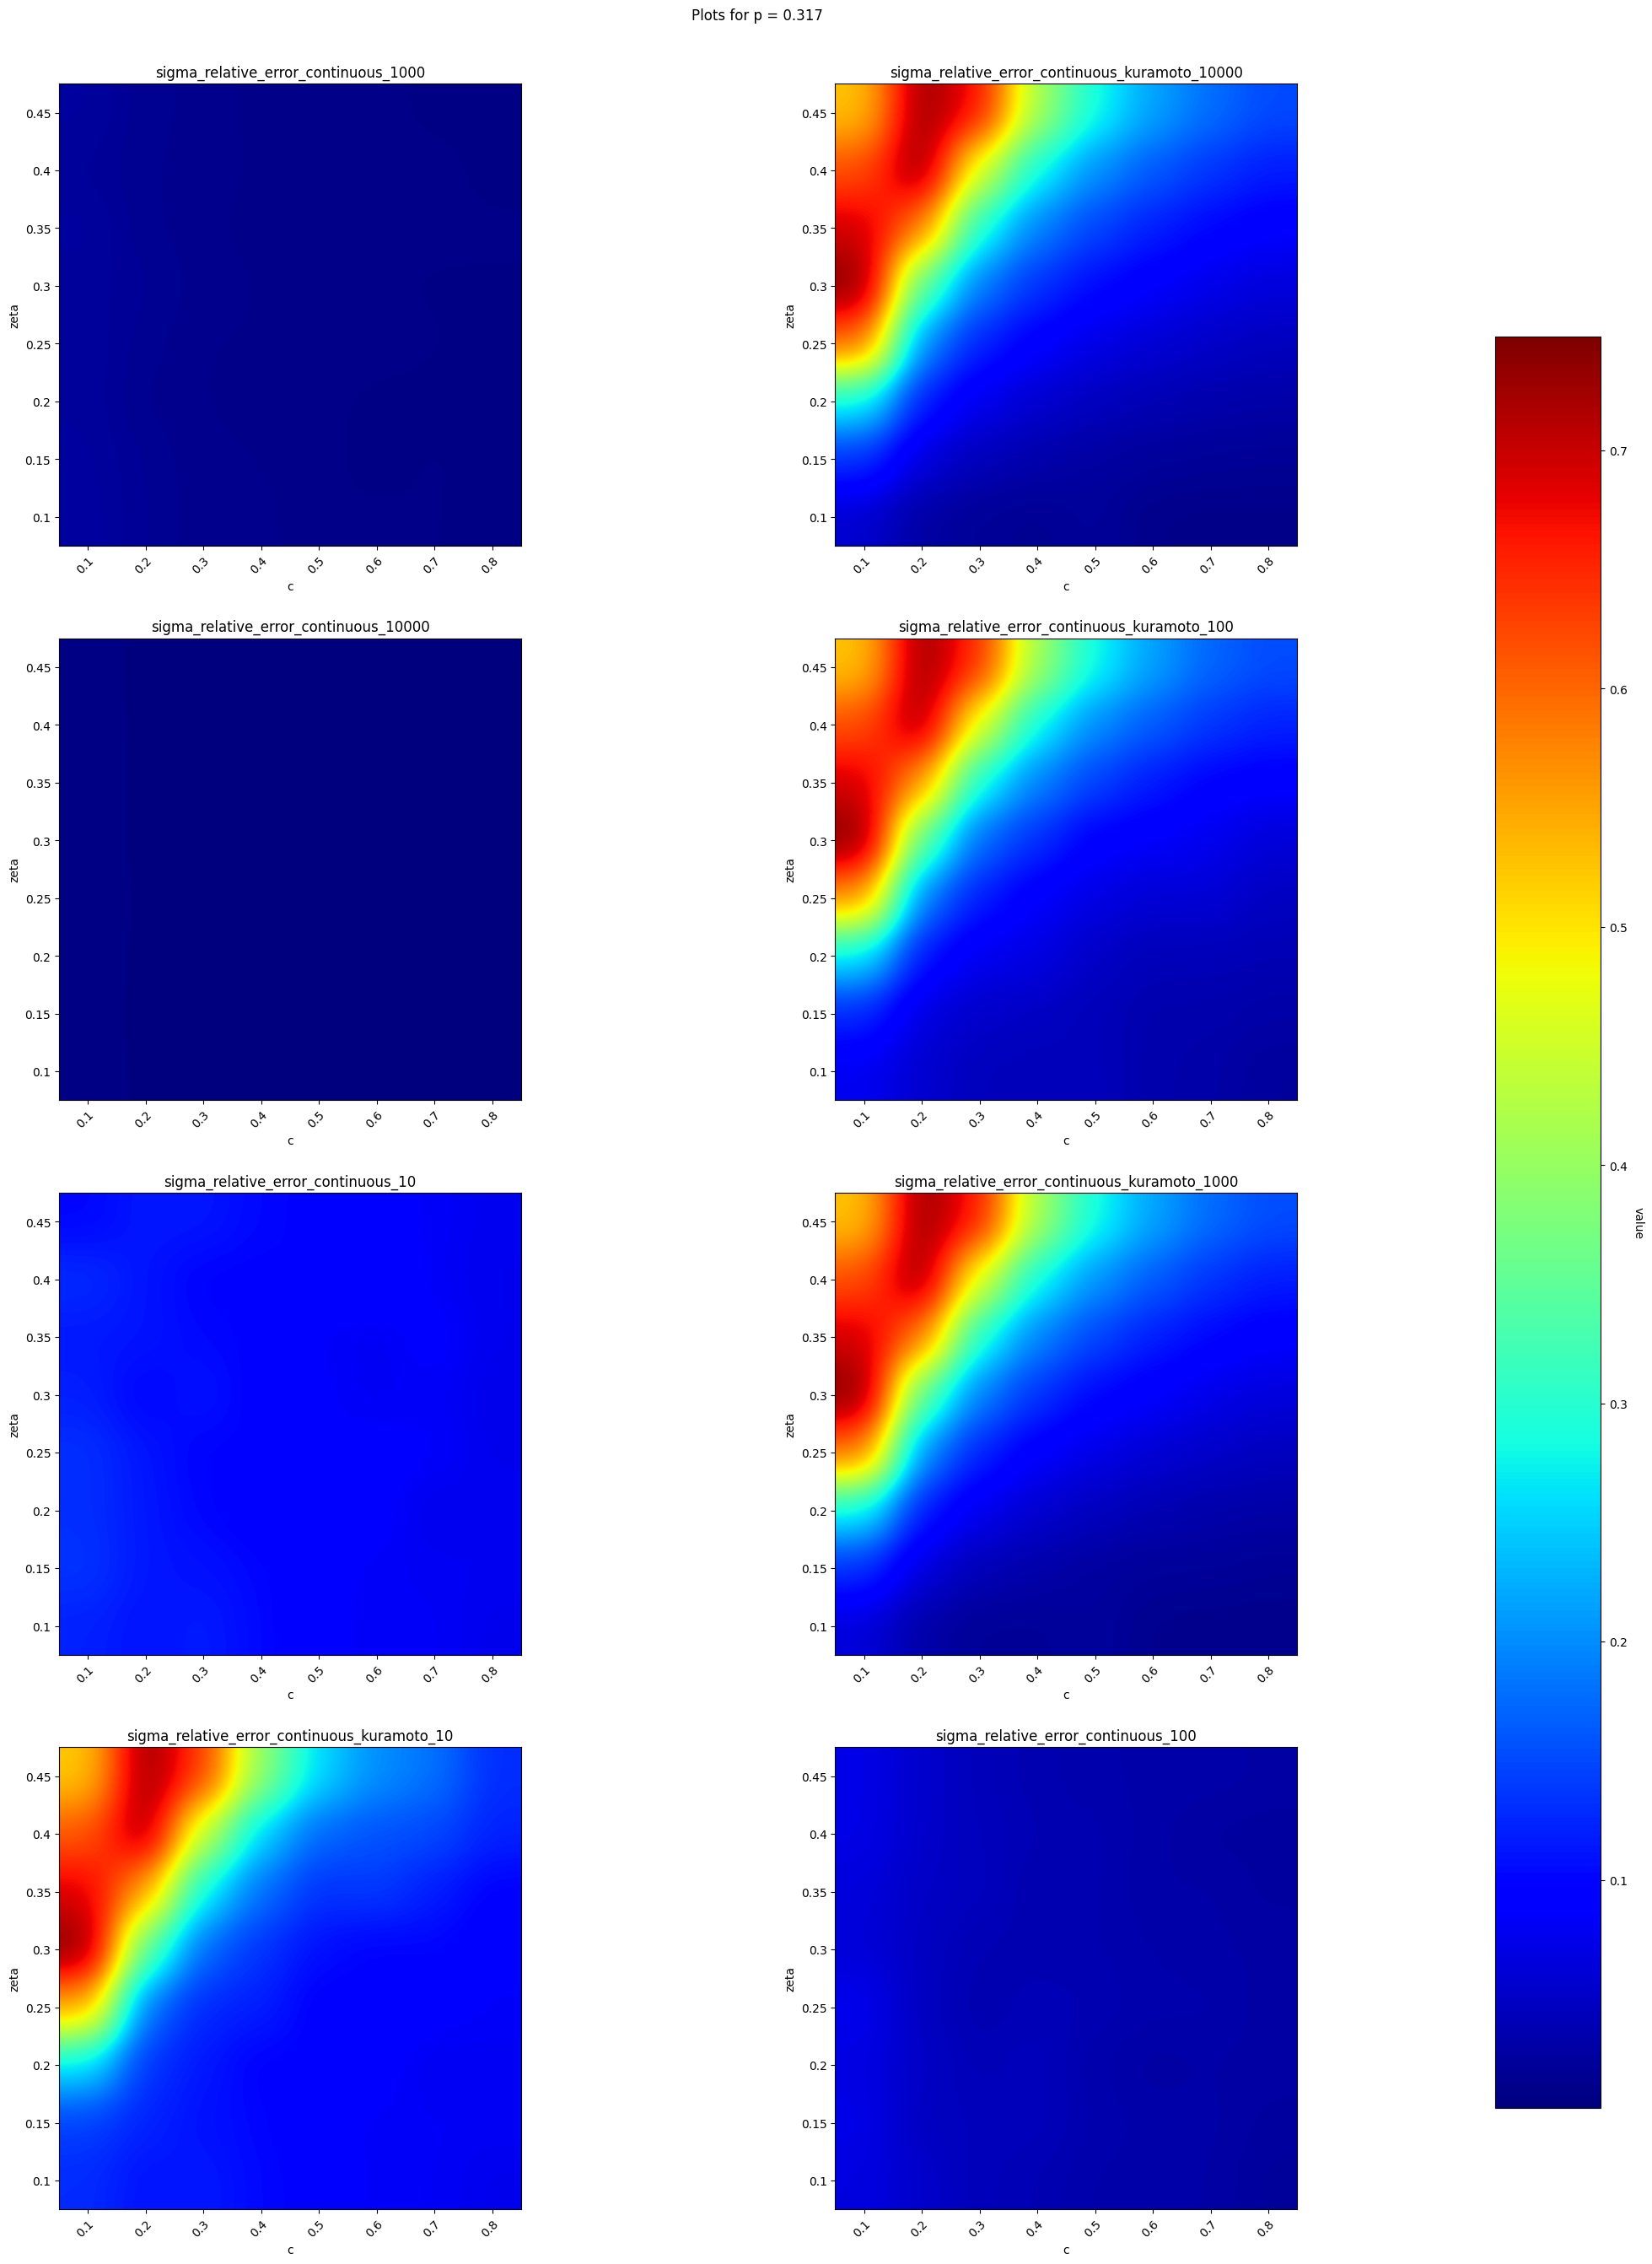

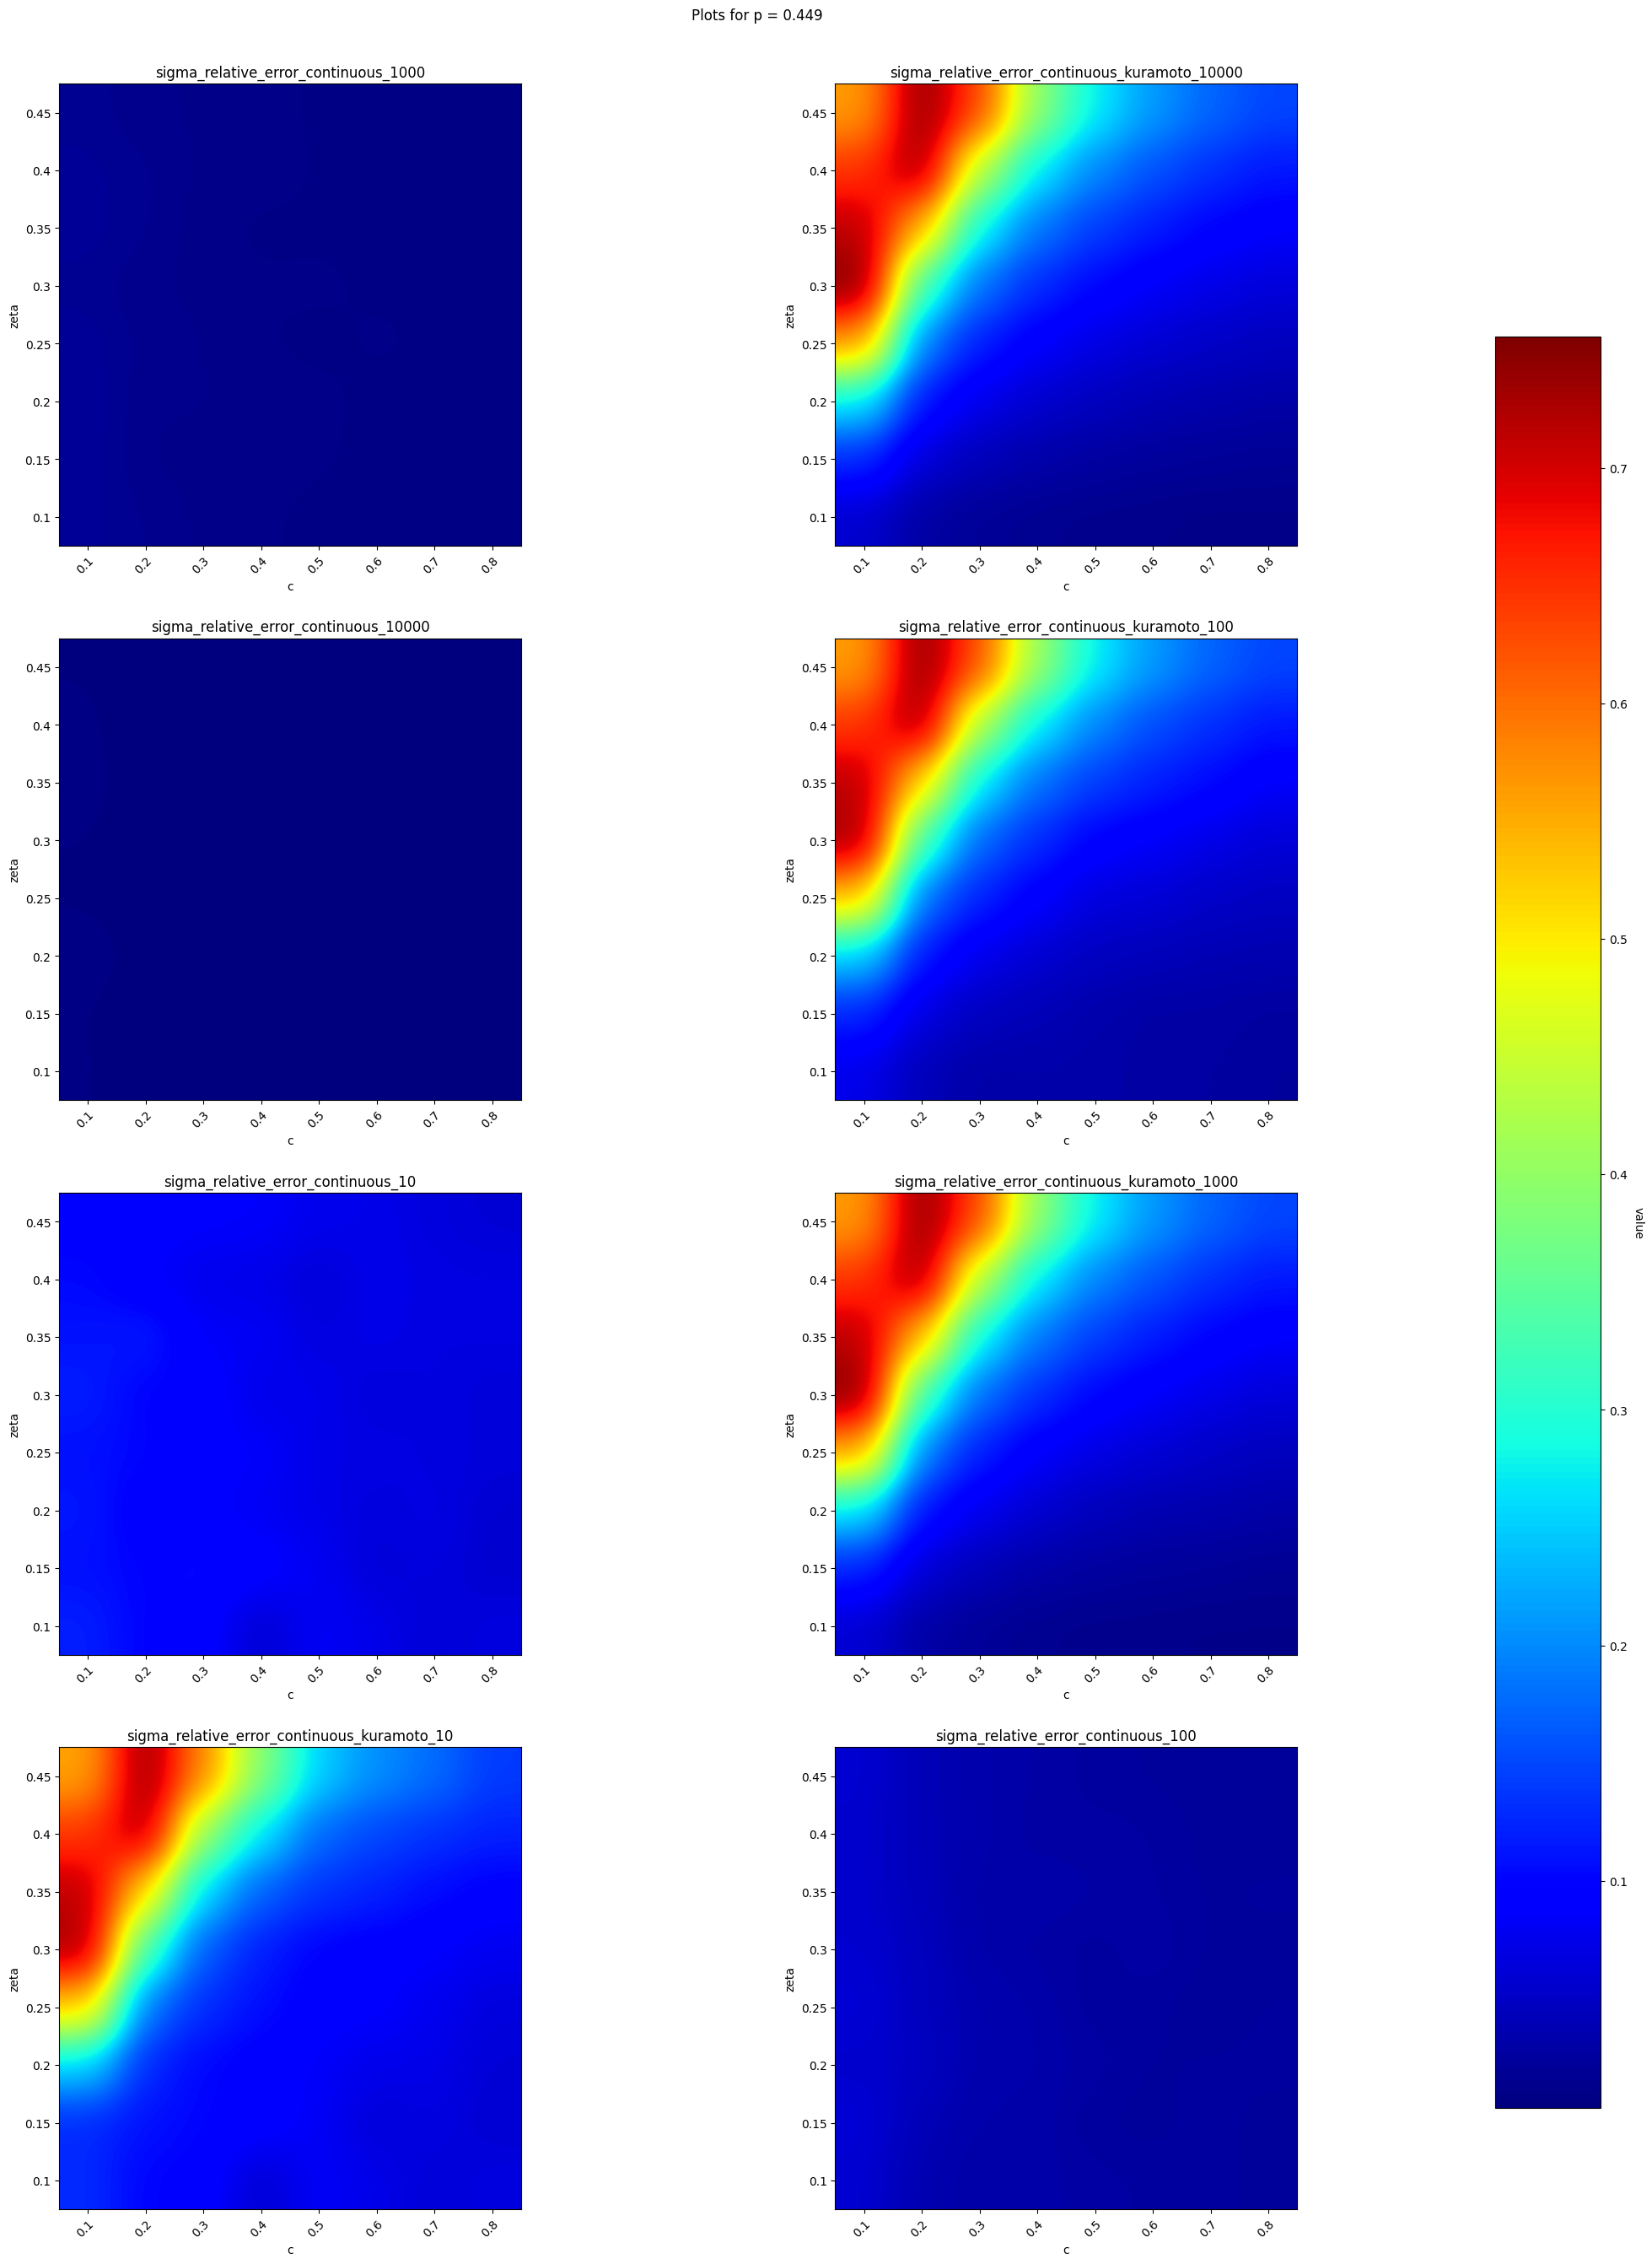

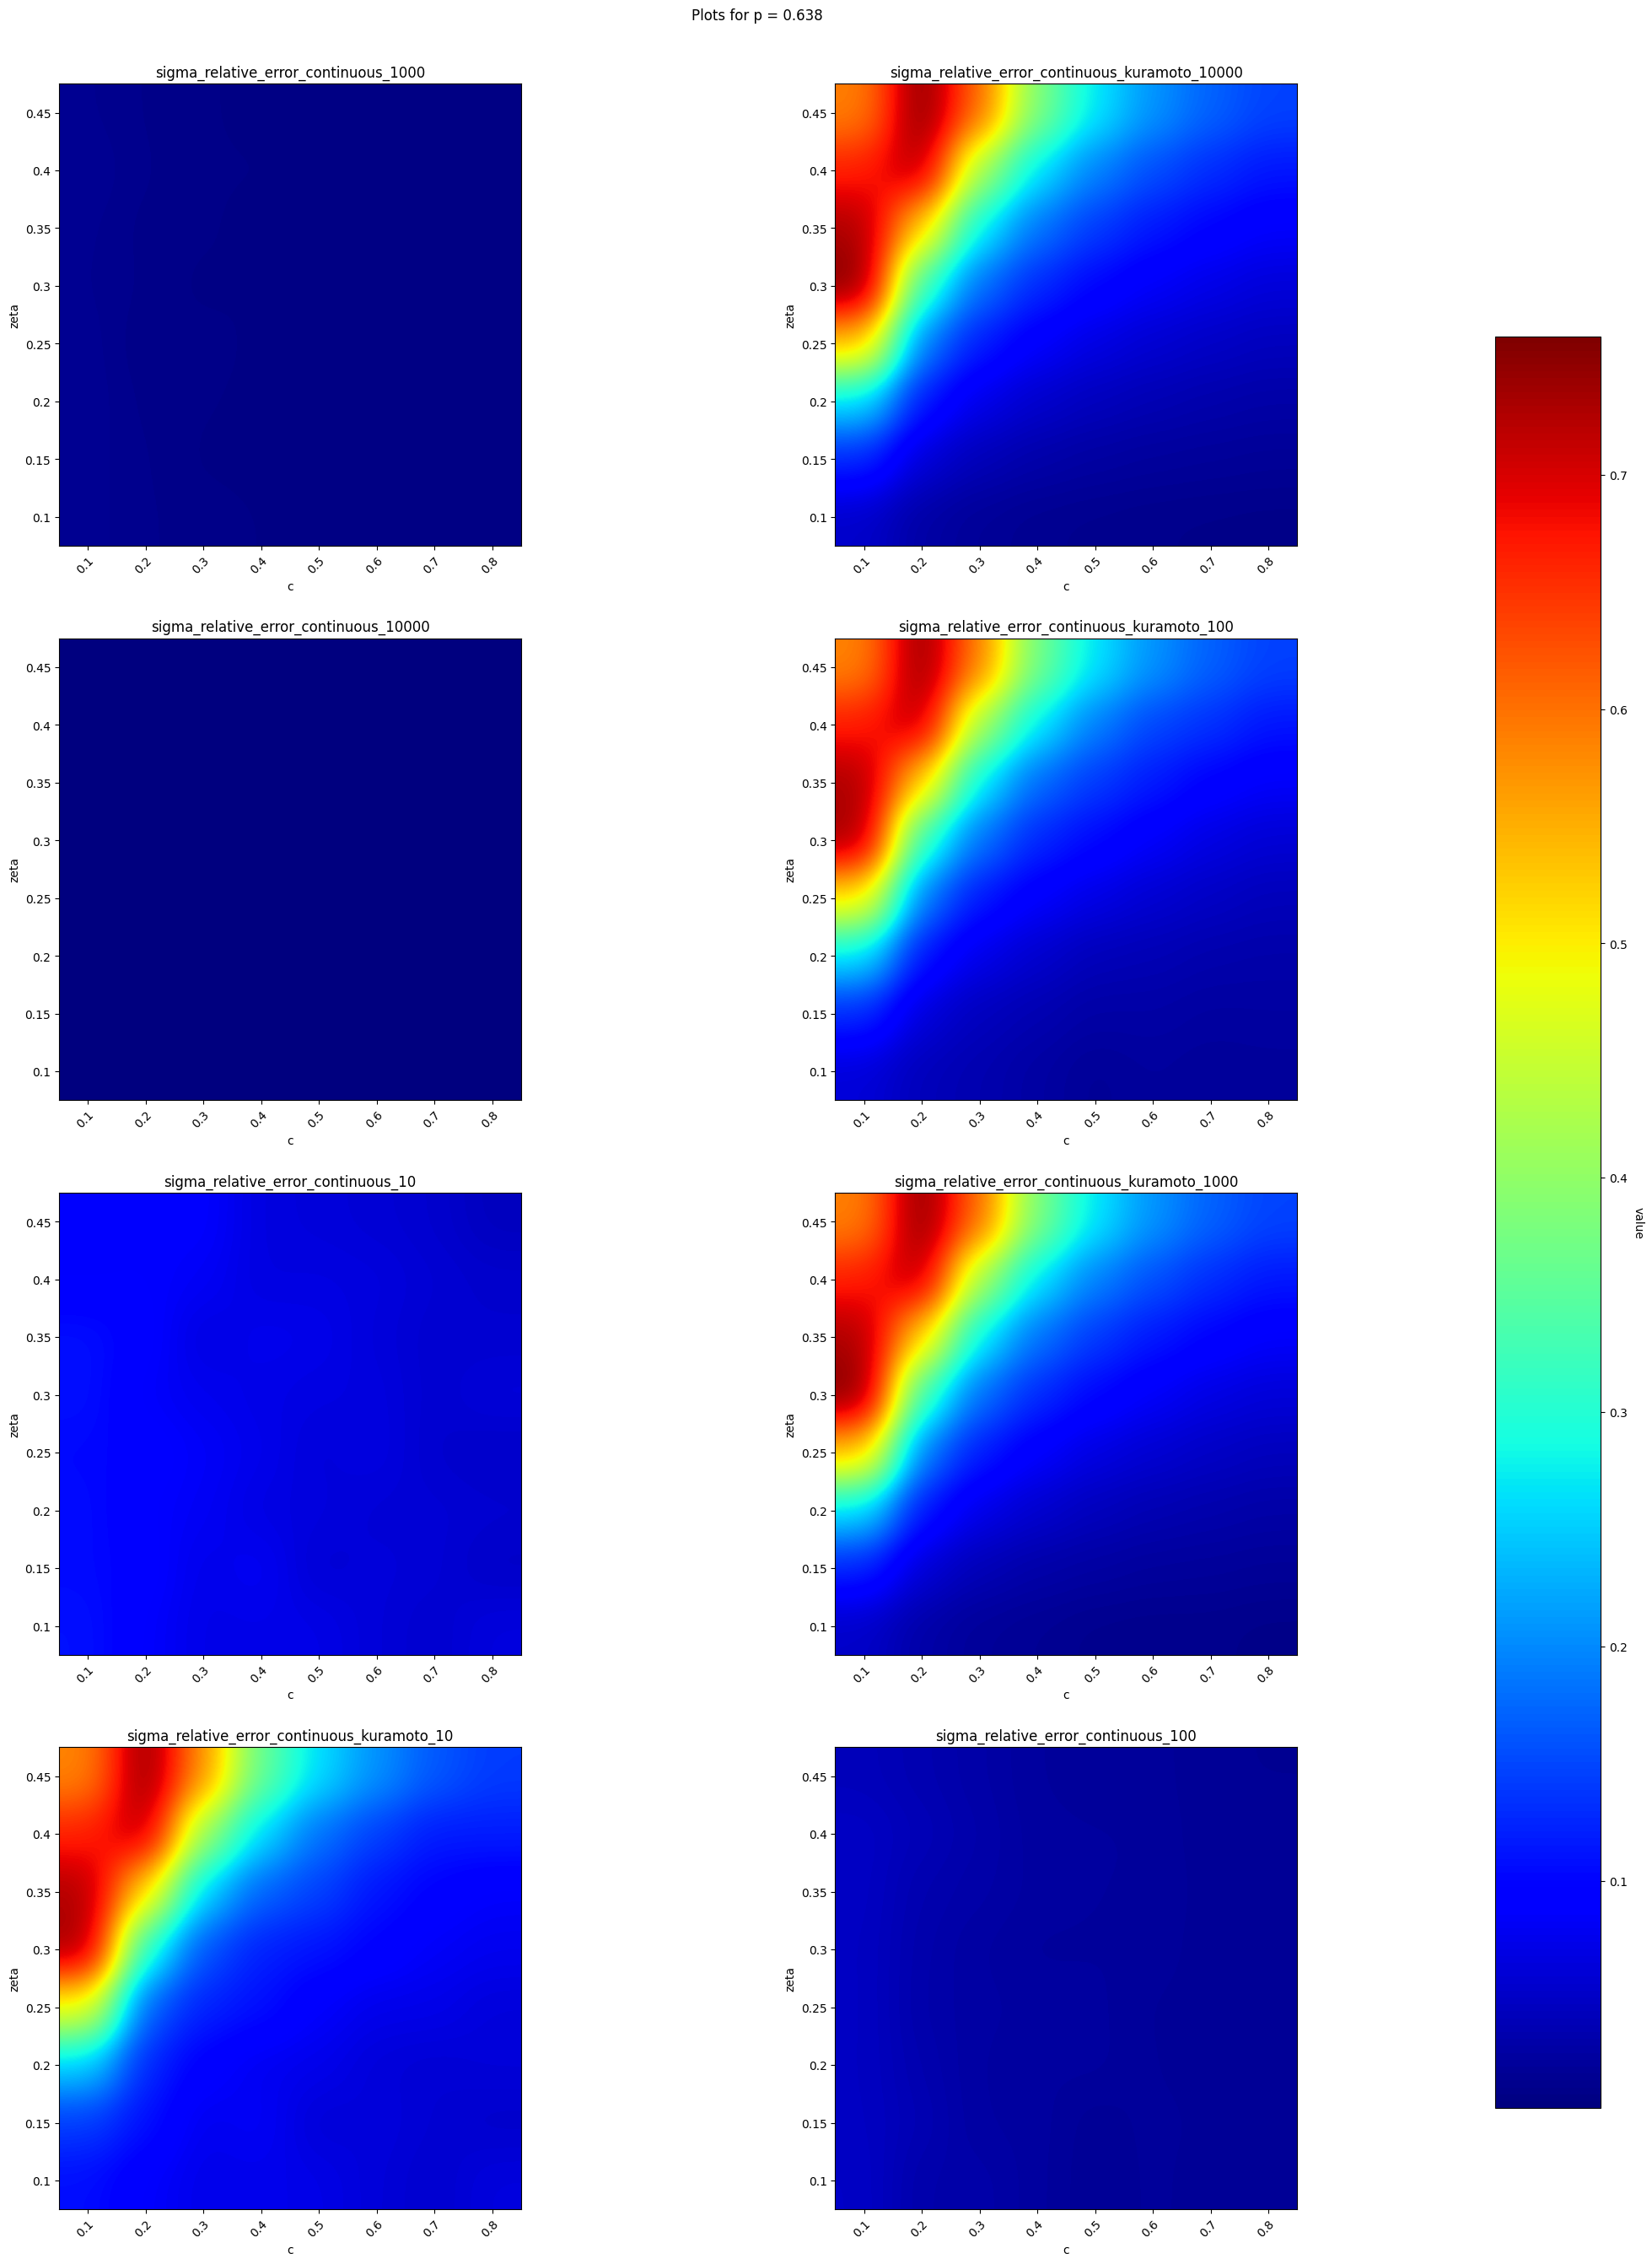

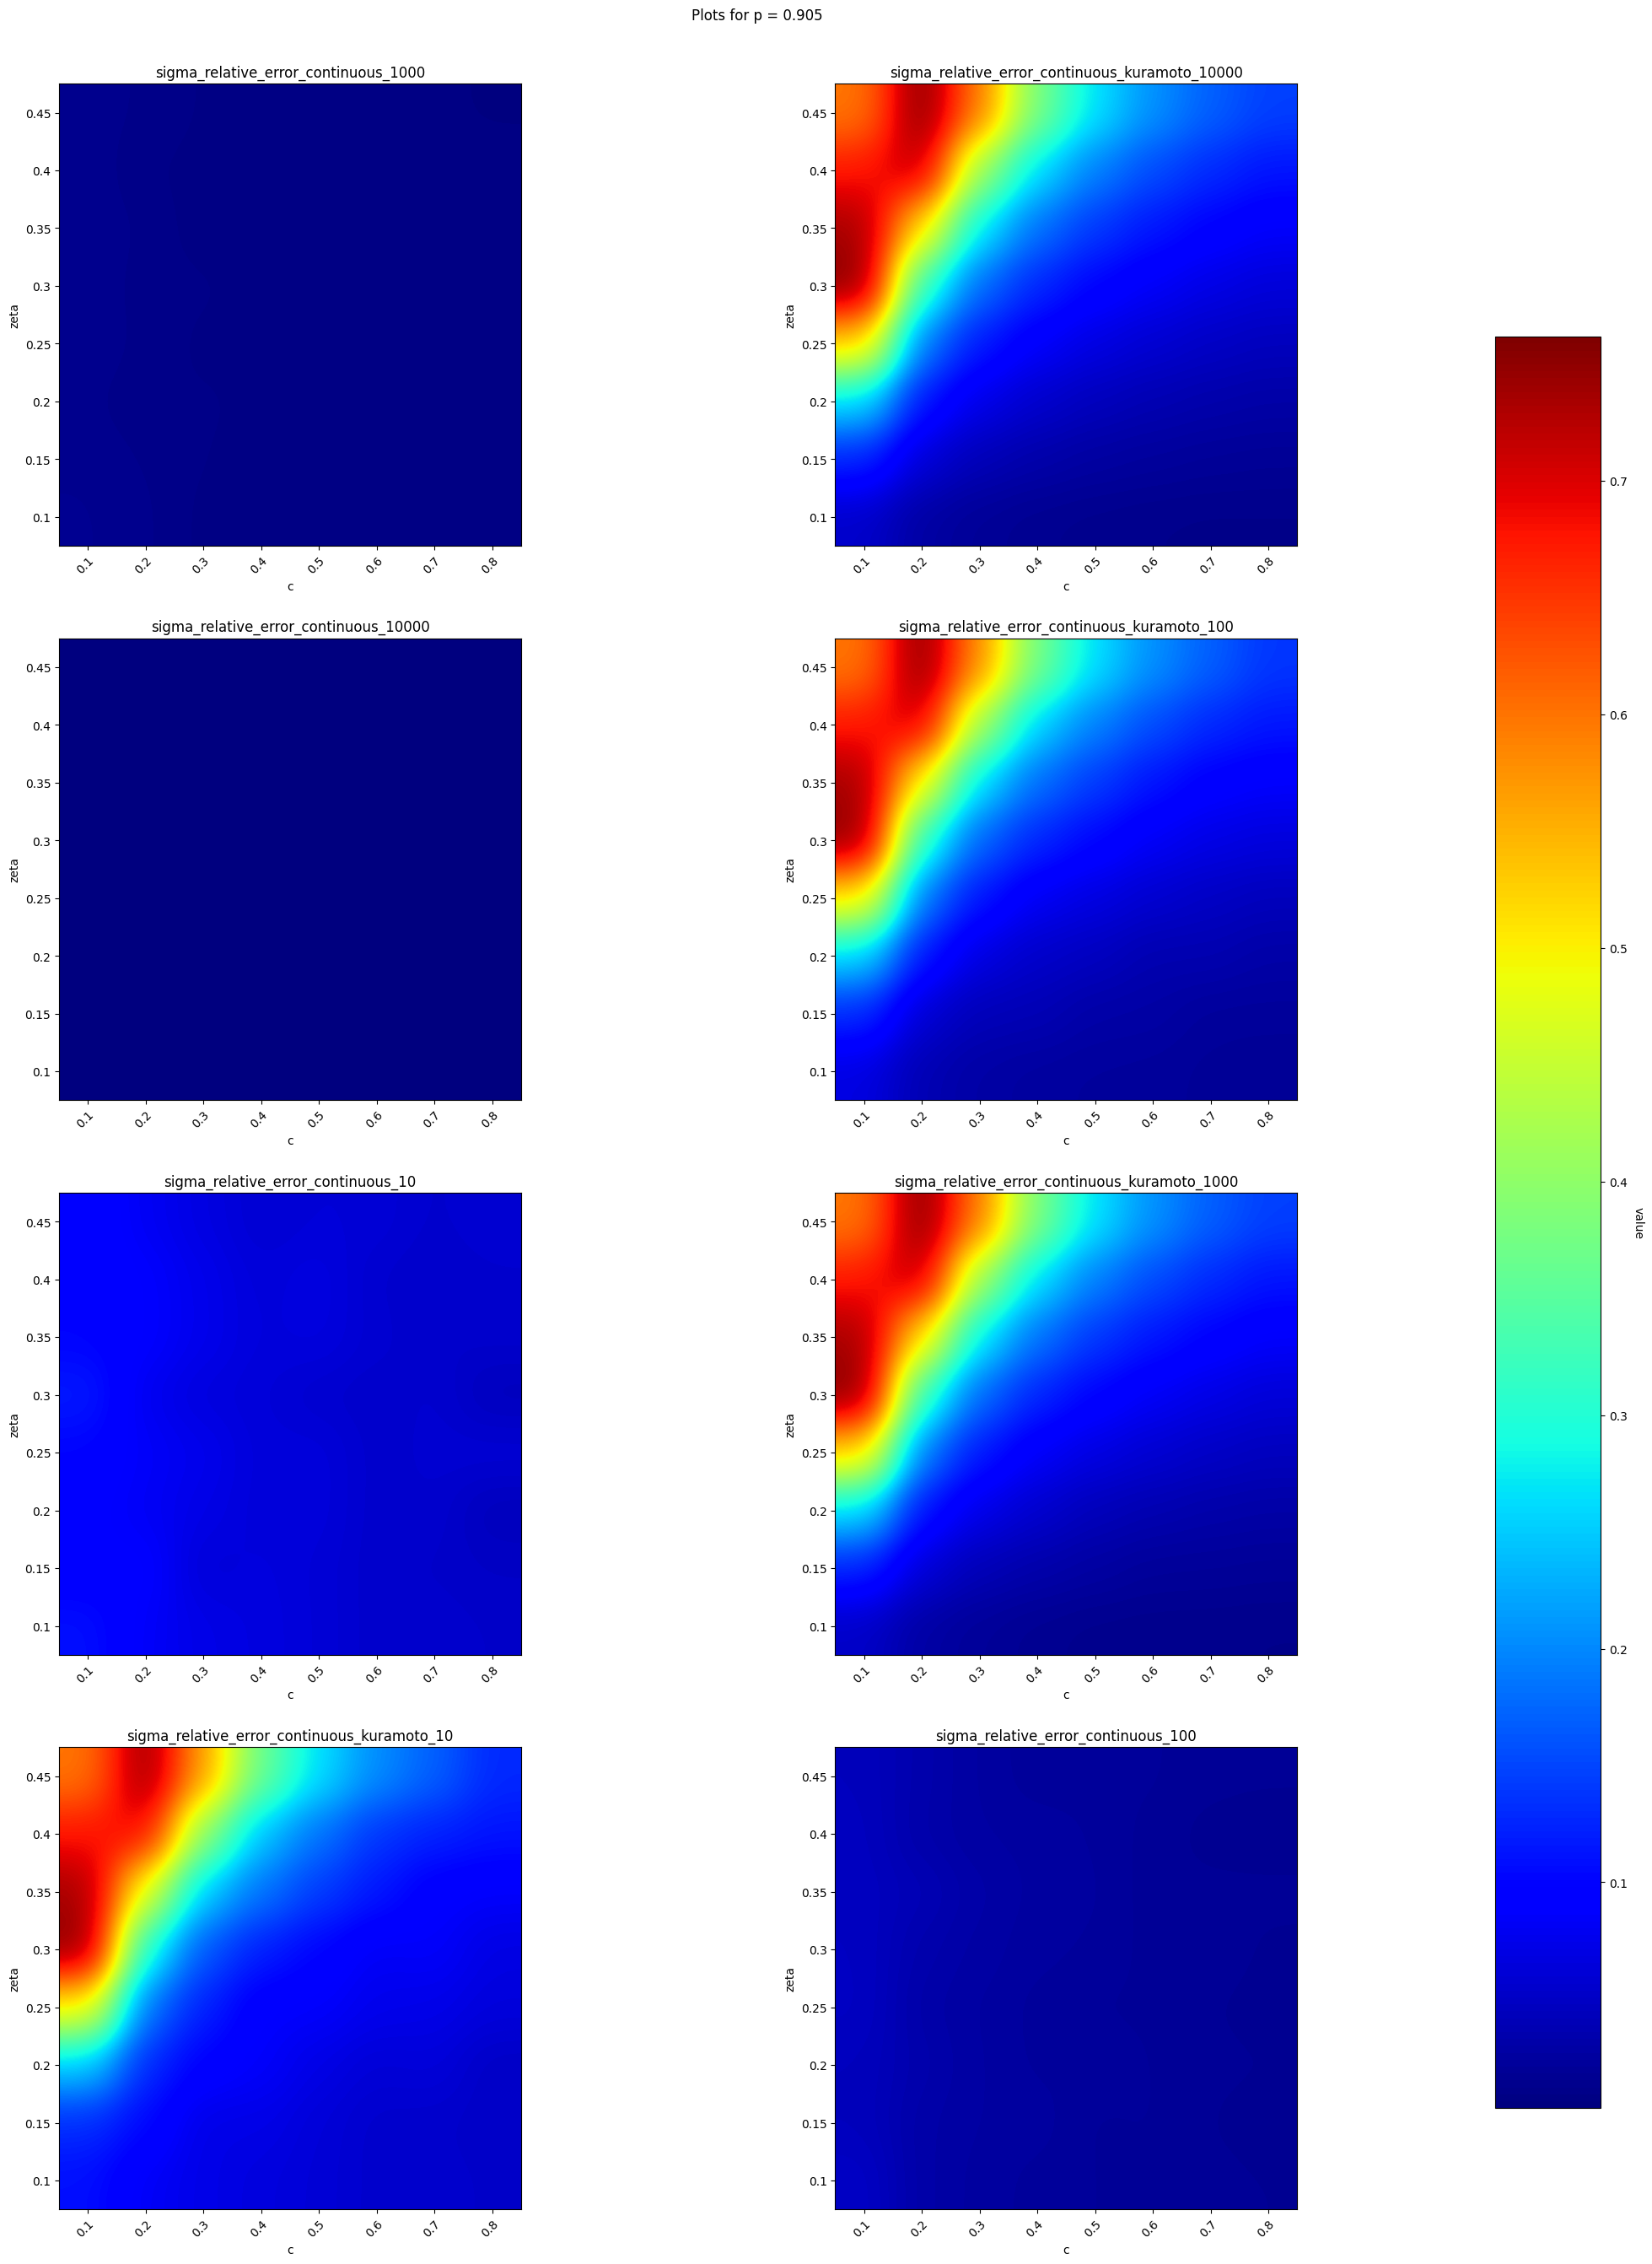

In [46]:
xyzplot2(csamp, "p", "c", "zeta")

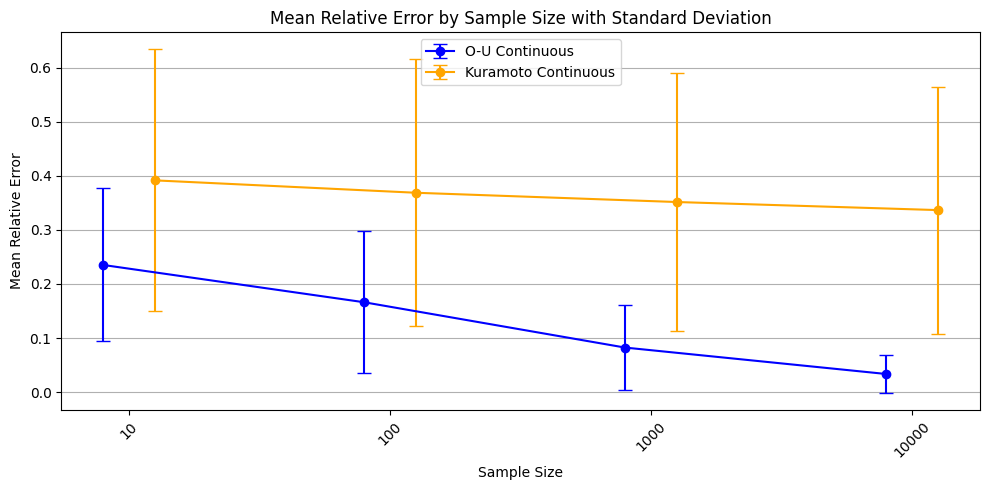

In [63]:


df = csamp
# Prepare the sample sizes and corresponding mean and standard deviation of relative errors
sample_sizes = ['10', '100', '1000', '10000']
ou_errors = [
    df['sigma_relative_error_continuous_' + size].mean() for size in sample_sizes
]
ou_std = [
    df['sigma_relative_error_continuous_' + size].std() for size in sample_sizes
]
kuramoto_errors = [
    df['sigma_relative_error_continuous_kuramoto_' + size].mean() for size in sample_sizes
]
kuramoto_std = [
    df['sigma_relative_error_continuous_kuramoto_' + size].std() for size in sample_sizes
]

# Create a DataFrame for plotting
mean_errors_df = pd.DataFrame({
    'Sample Size': sample_sizes,
    'O-U Continuous': ou_errors,
    'O-U Std': ou_std,
    'Kuramoto Continuous': kuramoto_errors,
    'Kuramoto Std': kuramoto_std
})

# Create a line plot with error bars
plt.figure(figsize=(10, 5))



# Offset Kuramoto points to the right
offset = 0.1
x_true = range(len(sample_sizes))
x_kuramoto = [x + offset for x in x_true]
x_ou = [x - offset for x in x_true]

# Plot O-U Continuous with error bars
plt.errorbar(x_ou, mean_errors_df['O-U Continuous'], yerr=mean_errors_df['O-U Std'],
             marker='o', label='O-U Continuous', color='blue', capsize=5)

# Plot Kuramoto Continuous with error bars
plt.errorbar(x_kuramoto, mean_errors_df['Kuramoto Continuous'], yerr=mean_errors_df['Kuramoto Std'],
             marker='o', label='Kuramoto Continuous', color='orange', capsize=5)

# Labeling the plot
plt.title('Mean Relative Error by Sample Size with Standard Deviation')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.xticks(ticks=x_true, labels=sample_sizes, rotation=45)
plt.grid(axis='y')  # Only show x-axis grid lines
plt.legend(loc='upper center', ncol=1)
plt.tight_layout()
plt.show()

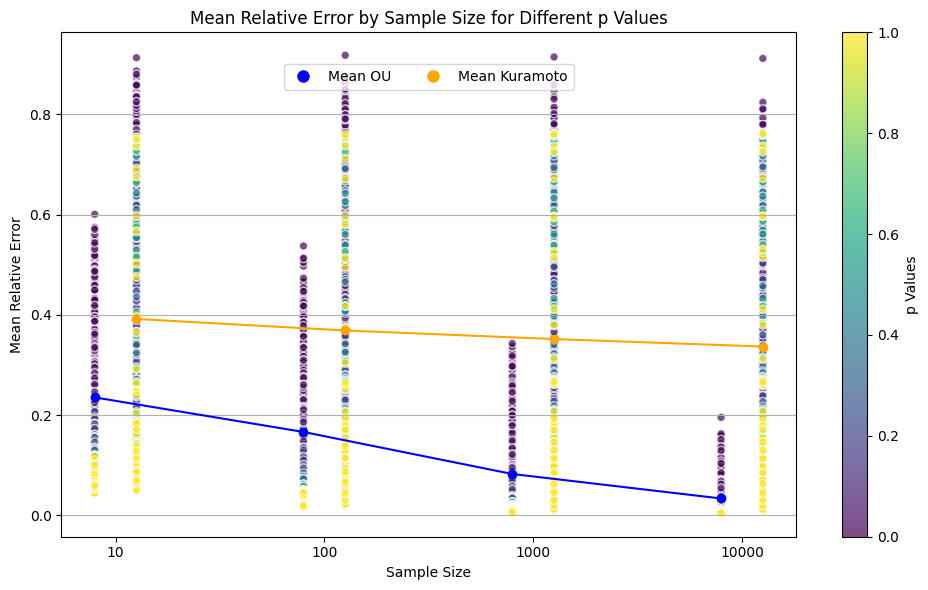

In [48]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'p'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(csamp[focus_variable].min(), csamp[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(csamp[col_ou].mean())
    mean_kuramoto.append(csamp[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * csamp.shape[0],
        csamp[col_ou],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * csamp.shape[0],
        csamp[col_kuramoto],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')

# Add colorbar to show focus variable values
cbar = plt.colorbar()
cbar.set_label(f'{focus_variable} Values')

# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for Different {focus_variable} Values')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()

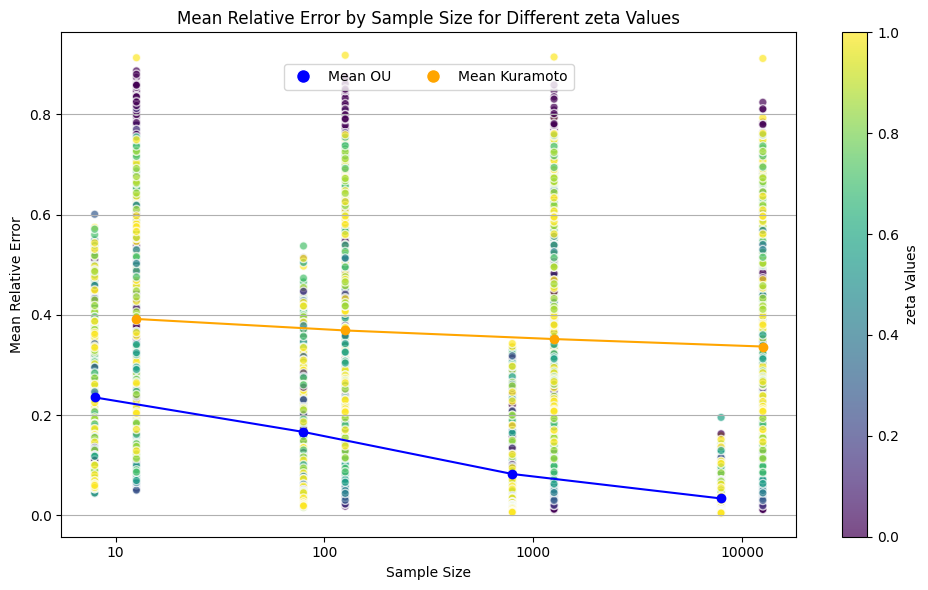

In [49]:
#GOOD!

from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'zeta'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(csamp[focus_variable].min(), csamp[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(csamp[col_ou].mean())
    mean_kuramoto.append(csamp[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * csamp.shape[0],
        csamp[col_ou],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * csamp.shape[0],
        csamp[col_kuramoto],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')

# Add colorbar to show focus variable values
cbar = plt.colorbar()
cbar.set_label(f'{focus_variable} Values')

# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for Different {focus_variable} Values')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()

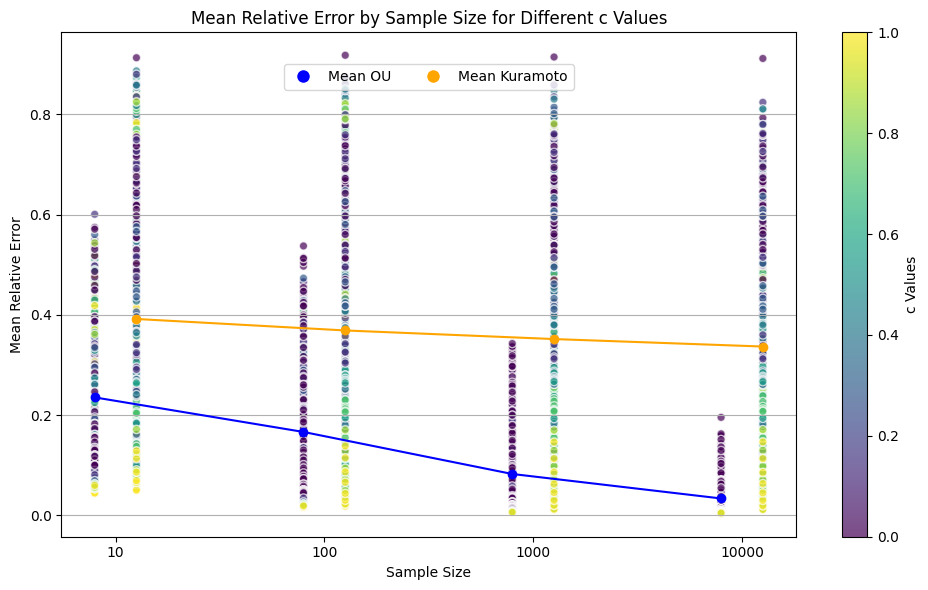

In [50]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'c'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(csamp[focus_variable].min(), csamp[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(csamp[col_ou].mean())
    mean_kuramoto.append(csamp[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * csamp.shape[0],
        csamp[col_ou],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * csamp.shape[0],
        csamp[col_kuramoto],
        c=cmap(norm(csamp[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')

# Add colorbar to show focus variable values
cbar = plt.colorbar()
cbar.set_label(f'{focus_variable} Values')

# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for Different {focus_variable} Values')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()

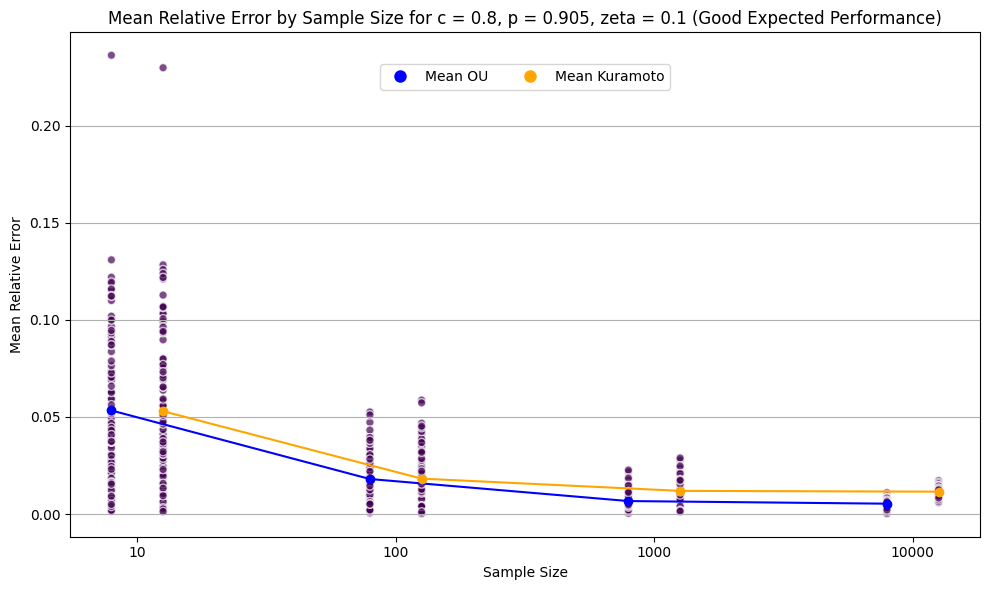

In [60]:
#Good sync
#Bad sync
#Ugly sync

#Good

df_invest = err_data[(err_data['c'] == 0.8) & (err_data['p'] == 0.905) & (err_data['zeta'] == 0.1)].reset_index(drop = False)

from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'zeta'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(df_invest[focus_variable].min(), df_invest[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(df_invest[col_ou].mean())
    mean_kuramoto.append(df_invest[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * df_invest.shape[0],
        df_invest[col_ou],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * df_invest.shape[0],
        df_invest[col_kuramoto],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')

# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for c = 0.8, p = 0.905, zeta = 0.1 (Good Expected Performance)')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()

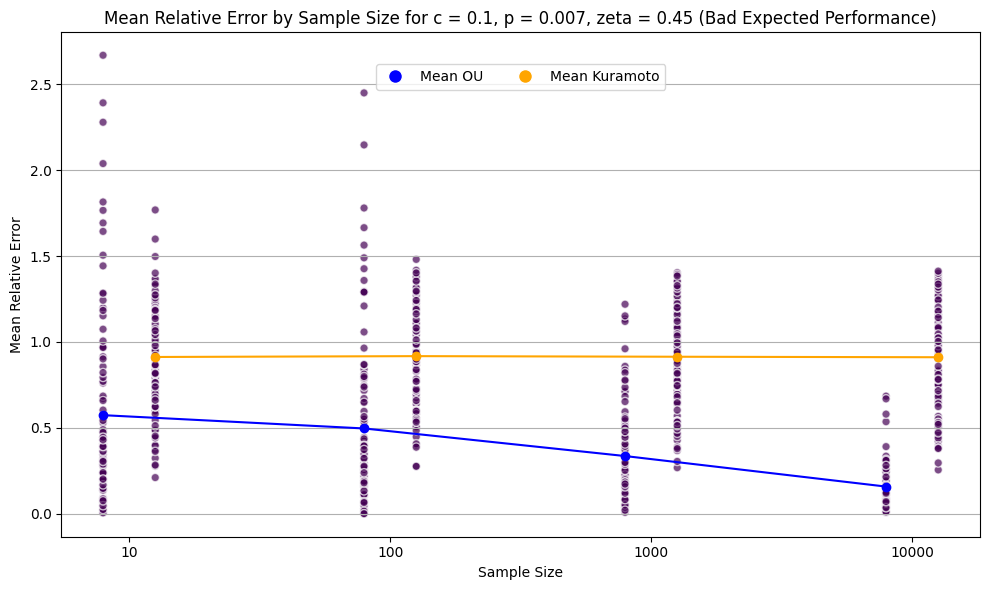

In [61]:
#Good sync
#Bad sync
#Ugly sync

#Bad

df_invest = err_data[(err_data['c'] == 0.1) & (err_data['p'] == 0.007) & (err_data['zeta'] == 0.45)].reset_index(drop = False)

from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'zeta'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(df_invest[focus_variable].min(), df_invest[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(df_invest[col_ou].mean())
    mean_kuramoto.append(df_invest[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * df_invest.shape[0],
        df_invest[col_ou],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * df_invest.shape[0],
        df_invest[col_kuramoto],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')


# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for c = 0.1, p = 0.007, zeta = 0.45 (Bad Expected Performance)')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()

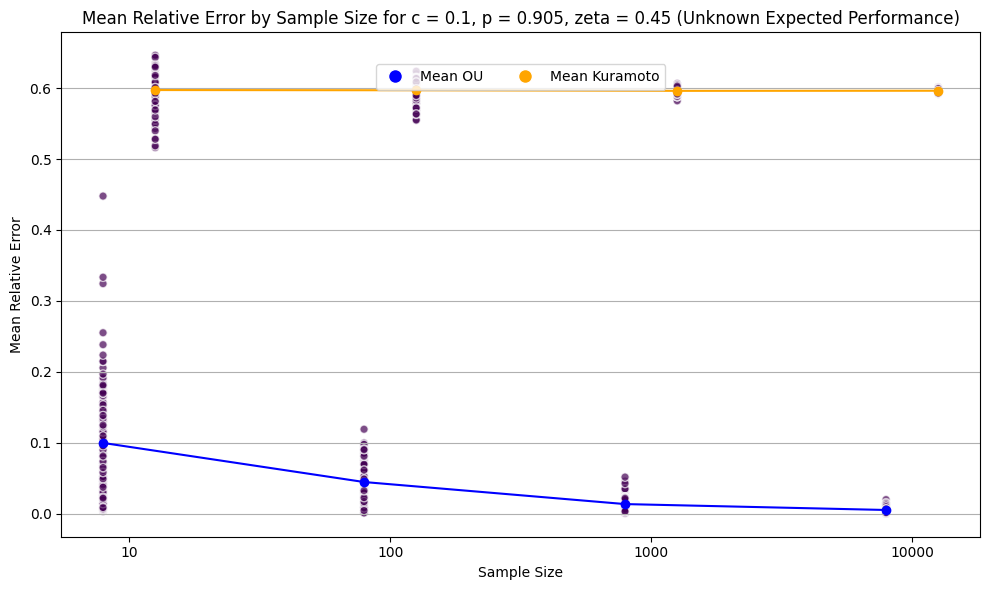

In [62]:
#Good sync
#Bad sync
#Ugly sync

#Weird

df_invest = err_data[(err_data['c'] == 0.1) & (err_data['p'] == 0.905) & (err_data['zeta'] == 0.45)].reset_index(drop = False)

from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use csamp DataFrame containing your data
# Set the variable to focus on
focus_variable = 'zeta'  # Change to 'zeta' to focus on zeta
sample_counts = ['10', '100', '1000', '10000']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Normalize the focus variable for colormap
norm = plt.Normalize(df_invest[focus_variable].min(), df_invest[focus_variable].max())
cmap = cm.viridis  # You can choose any colormap you like

# Prepare to store mean values for the line
mean_ou = []
mean_kuramoto = []

# Loop through each sample count and plot
for i, n in enumerate(sample_counts):
    # Select the relevant columns for this sample count
    col_ou = f'sigma_relative_error_continuous_{n}'
    col_kuramoto = f'sigma_relative_error_continuous_kuramoto_{n}'

    # Calculate mean values
    mean_ou.append(df_invest[col_ou].mean())
    mean_kuramoto.append(df_invest[col_kuramoto].mean())

    # Scatter the focus variable (p or zeta) with color based on the focus variable
    plt.scatter(
        [i - 0.1] * df_invest.shape[0],
        df_invest[col_ou],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'OU Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )
    
    plt.scatter(
        [i + 0.1] * df_invest.shape[0],
        df_invest[col_kuramoto],
        c=cmap(norm(df_invest[focus_variable])),  # Color based on focus variable
        label=f'Kuramoto Samples {n}',
        alpha=0.7,
        edgecolor='w'
    )

# Plot lines connecting the mean values
plt.plot(np.arange(len(sample_counts)) - 0.1, mean_ou, marker='o', color='blue', label='Mean OU', linestyle='-')
plt.plot(np.arange(len(sample_counts)) + 0.1, mean_kuramoto, marker='o', color='orange', label='Mean Kuramoto', linestyle='-')

# Set x-ticks to correspond to sample counts
plt.xticks(np.arange(len(sample_counts)), sample_counts)

# Labeling the plot
plt.title(f'Mean Relative Error by Sample Size for c = 0.1, p = 0.905, zeta = 0.45 (Unknown Expected Performance)')
plt.xlabel('Sample Size')
plt.ylabel('Mean Relative Error')
plt.grid(axis='y')  # Only show y-axis grid lines

# Create custom legend handles
mean_ou_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean OU', markerfacecolor='blue', markersize=10)
mean_kuramoto_line = plt.Line2D([0], [0], marker='o', color='w', label='Mean Kuramoto', markerfacecolor='orange', markersize=10)

# Move the legend to cover the lines
plt.legend(handles=[mean_ou_line, mean_kuramoto_line], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.tight_layout()
plt.show()